## Loading the libraries and data

In [1]:
suppressMessages(library(fable))
suppressMessages(library(forecast))
suppressMessages(library(tidyverse))
suppressMessages(library(tsibble))
suppressMessages(library(scales))
suppressMessages(library(feasts))
suppressMessages(library(magrittr))
suppressMessages(library(tsibble))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(gridExtra))

In [2]:
# loading the csv file
apple_data <- read.csv('iPhone Sales.csv')
apple_data %>% head()

,Time.Period,Sales....millions.,Units..millions.,Sales.Per.Unit
,<chr>,<int>,<dbl>,<dbl>
1,2007Q3,5,0.27,18.51852
2,2007Q4,118,1.12,105.35714
3,2008Q1,241,2.32,103.87931
4,2008Q2,378,1.70,222.35294
5,2008Q3,419,0.72,581.94444
6,2008Q4,806,6.89,116.98113


In [3]:
names(apple_data)

[1] "Time.Period"        "Sales....millions." "Units..millions."  
[4] "Sales.Per.Unit"

In [4]:
# Changing the column names
names(apple_data) <- c('Quarters', 'Sales_in_millions','Units_in_millions','Avg_Selling_Price')
names(apple_data)

[1] "Quarters"          "Sales_in_millions" "Units_in_millions"
[4] "Avg_Selling_Price"

In [5]:
# displaying the data
apple_data %>% head()

,Quarters,Sales_in_millions,Units_in_millions,Avg_Selling_Price
,<chr>,<int>,<dbl>,<dbl>
1,2007Q3,5,0.27,18.51852
2,2007Q4,118,1.12,105.35714
3,2008Q1,241,2.32,103.87931
4,2008Q2,378,1.70,222.35294
5,2008Q3,419,0.72,581.94444
6,2008Q4,806,6.89,116.98113


In [6]:
# changing the data to a tsibble data
ts_apple_data <- apple_data %>%
  mutate(Quarters = yearquarter(Quarters)) %>%
  as_tsibble(index = Quarters)

ts_apple_data %>% head()

Quarters,Sales_in_millions,Units_in_millions,Avg_Selling_Price
<qtr>,<int>,<dbl>,<dbl>
2007 Q3,5,0.27,18.51852
2007 Q4,118,1.12,105.35714
2008 Q1,241,2.32,103.87931
2008 Q2,378,1.70,222.35294
2008 Q3,419,0.72,581.94444
2008 Q4,806,6.89,116.98113


In [7]:
# taking the sales data to a new tsibble
ts_sales <- ts_apple_data%>%
    select(1:2)%>%
  as_tsibble(index = Quarters)
ts_sales <- ts_sales |> na.omit()
ts_sales %>% head()

Quarters,Sales_in_millions
<qtr>,<int>
2007 Q3,5
2007 Q4,118
2008 Q1,241
2008 Q2,378
2008 Q3,419
2008 Q4,806


In [8]:
# taking the units sold data to a new tsibble
ts_units <- ts_apple_data%>%
    select(1,3)
ts_units <- ts_units |> na.omit()
ts_units %>% head()

Quarters,Units_in_millions
<qtr>,<dbl>
2007 Q3,0.27
2007 Q4,1.12
2008 Q1,2.32
2008 Q2,1.70
2008 Q3,0.72
2008 Q4,6.89


In [9]:
# taking the selling price data to a new tsibble
ts_avg_sp <- ts_apple_data%>%
    select(1,4)
ts_avg_sp <- ts_avg_sp |> na.omit()
ts_avg_sp %>% head()

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2007 Q3,18.51852
2007 Q4,105.35714
2008 Q1,103.87931
2008 Q2,222.35294
2008 Q3,581.94444
2008 Q4,116.98113


In [10]:
ts_sales <- ts(ts_sales$Sales_in_millions, start=c(2007,3), frequency = 4)
ts_sales %>% head()

,Qtr1,Qtr2,Qtr3,Qtr4
2007,,,5,118
2008,241,378,419,806


In [11]:
ts_units <- ts(ts_units$Units_in_millions, start=c(2007,3), frequency = 4)
ts_units%>% head()

,Qtr1,Qtr2,Qtr3,Qtr4
2007,,,0.27,1.12
2008,2.32,1.70,0.72,6.89


In [12]:
ts_avg_sp <- ts(ts_avg_sp$Avg_Selling_Price, start=c(2007,3), frequency = 4)
ts_avg_sp%>% head()

,Qtr1,Qtr2,Qtr3,Qtr4
2007,,,18.51852,105.35714
2008,103.87931,222.35294,581.94444,116.98113


## Visualisations with decompositions

In [13]:
# All plots related to Sales data
sales_autoplot <- ts_sales %>% autoplot() +  labs(y = "$ (millions)",
       title = "Sales in millions")
log_sale_autoplot <- ts_sales %>%log() %>% autoplot() +  labs(y = "Log of sales",
       title = "Log of Sales in millions")
diff_sale_autoplot <- ts_sales %>%diff() %>% autoplot() +  labs(y = "Difference of sales",
       title = "Difference of Sales in millions")
log_diff_sale_autoplot <- ts_sales %>% log()%>%diff()  %>% autoplot() +  labs(y = "Log Difference of sales",
       title = "Log Difference of Sales in millions")

In [14]:
#plots related to units data 
units_autoplot <- ts_units %>% autoplot() +  labs(y = "Units in millions)",
       title = "Number of units Sold in millions")
log_units_autoplot <- ts_units %>%log() %>% autoplot() +  labs(y = "Log of units in millions",
       title = "Log of Number of units Sold in millions")
diff_units_autoplot <- ts_units %>%diff() %>% autoplot() +  labs(y = "Difference of units in millions",
       title = "Difference of Number of units Sold in millions")
log_diff_units_autoplot <- ts_units %>% log()%>%diff()  %>% autoplot() +  labs(y = "Log Difference of units in millions",
       title = "Log Difference of Number of units Sold in millions")

In [15]:
# plots related to average selling price data
avg_sp_autoplot <- ts_avg_sp %>% autoplot() +  labs(y = "Average Selling Price",
       title = "Average Selling Price")
log_avg_sp_autoplot <- ts_avg_sp %>%log() %>% autoplot() +  labs(y = "Log of Average Selling Price",
       title = "Log of Average Selling Price")
diff_avg_sp_autoplot <- ts_avg_sp %>%diff() %>% autoplot() +  labs(y = "Difference of Average Selling Price",
       title = "Difference of Average Selling Price")
log_diff_avg_sp_autoplot <- ts_avg_sp %>% log()%>%diff()  %>% autoplot() +  labs(y = "Log Difference of Average Selling Price",
       title = "Log Difference of Average Selling Price")

In [16]:
#setting for plot dimensions
options(repr.plot.width=20, repr.plot.height=12)

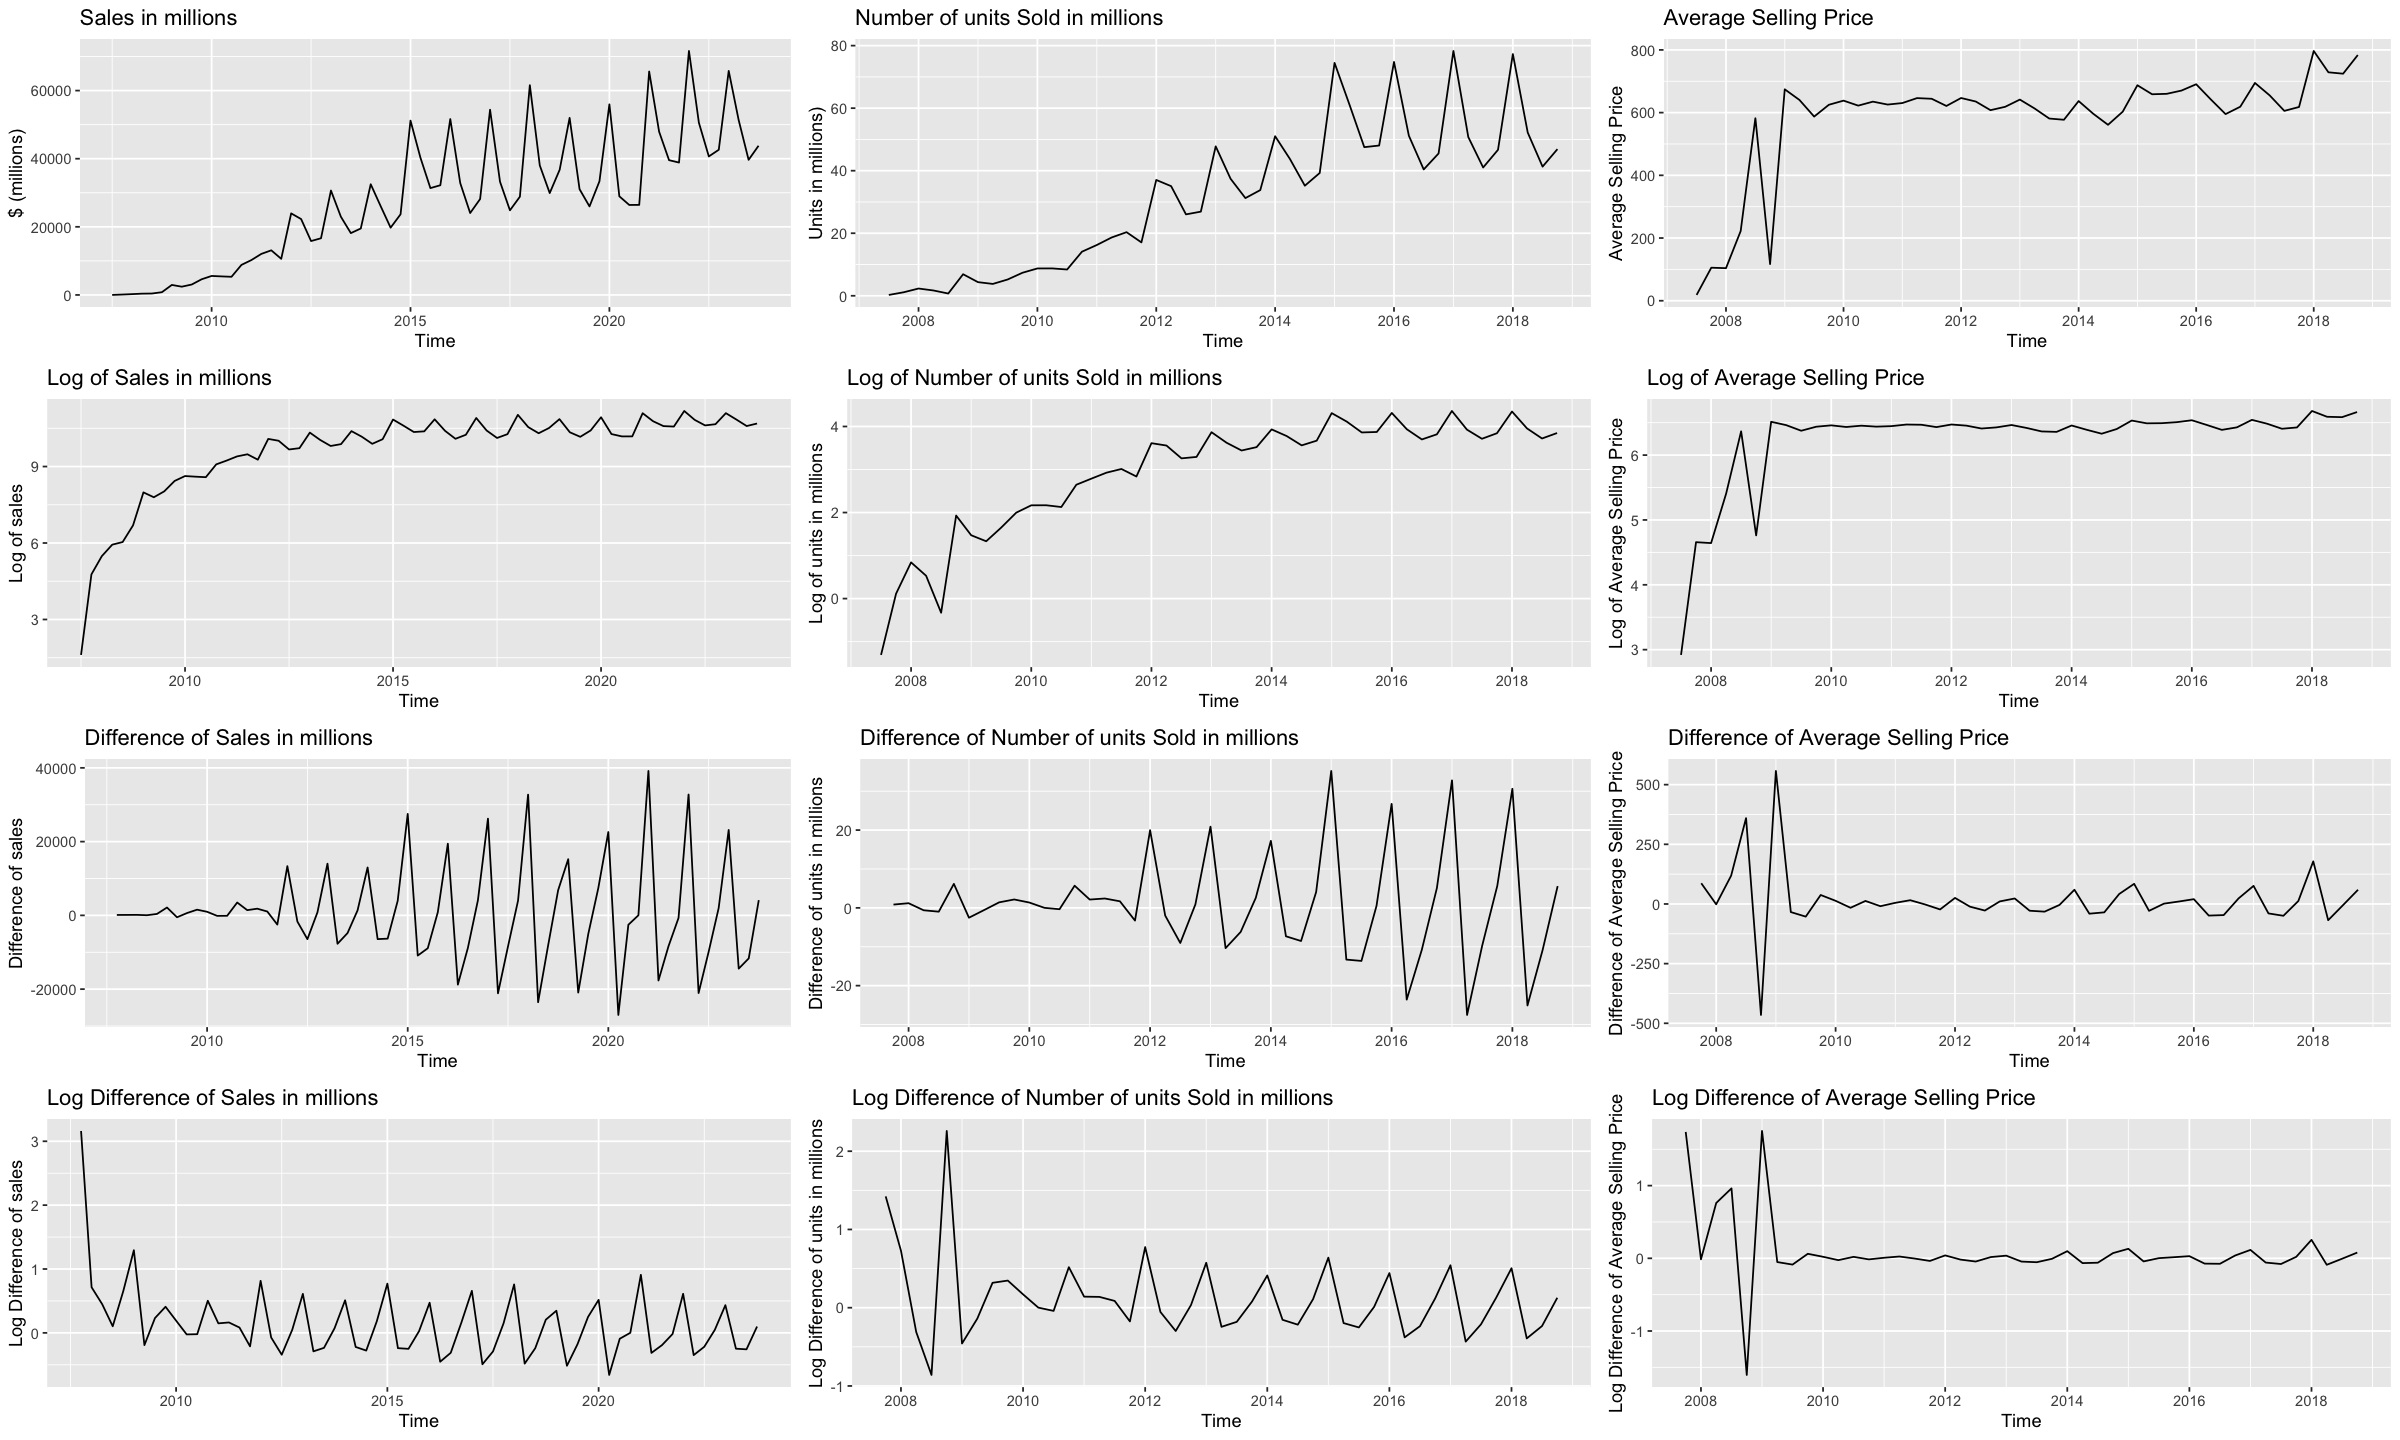

In [17]:
#Plots of the data including decomposition
arrangeGrob(sales_autoplot, units_autoplot, avg_sp_autoplot,
            log_sale_autoplot, log_units_autoplot, log_avg_sp_autoplot,
            diff_sale_autoplot, diff_units_autoplot, diff_avg_sp_autoplot,
            log_diff_sale_autoplot, log_diff_units_autoplot,log_diff_avg_sp_autoplot, ncol=3) %>% plot()

In [18]:
# creating the seasonal plots for all the data including the decomposition
sales_ggseasonplot <- ts_sales %>% ggseasonplot() +  labs(y = "$ (millions)",
       title = "Sales in millions")
log_sale_ggseasonplot <- ts_sales %>%log() %>% ggseasonplot() +  labs(y = "Log of sales",
       title = "Log of Sales in millions")
diff_sale_ggseasonplot <- ts_sales %>%diff() %>% ggseasonplot() +  labs(y = "Difference of sales",
       title = "Difference of Sales in millions")
log_diff_sale_ggseasonplot <- ts_sales %>% log()%>%diff()  %>% ggseasonplot() +  labs(y = "Log Difference of sales",
       title = "Log Difference of Sales in millions")

units_ggseasonplot <- ts_units %>% ggseasonplot() +  labs(y = "Units in millions)",
       title = "Number of units Sold in millions")
log_units_ggseasonplot <- ts_units %>%log() %>% ggseasonplot() +  labs(y = "Log of units in millions",
       title = "Log of Number of units Sold in millions")
diff_units_ggseasonplot <- ts_units %>%diff() %>% ggseasonplot() +  labs(y = "Difference of units in millions",
       title = "Difference of Number of units Sold in millions")
log_diff_units_ggseasonplot <- ts_units %>% log()%>%diff()  %>% ggseasonplot() +  labs(y = "Log Difference of units in millions",
       title = "Log Difference of Number of units Sold in millions")


avg_sp_ggseasonplot <- ts_avg_sp %>% ggseasonplot() +  labs(y = "Average Selling Price",
       title = "Average Selling Price")
log_avg_sp_ggseasonplot <- ts_avg_sp %>%log() %>% ggseasonplot() +  labs(y = "Log of Average Selling Price",
       title = "Log of Average Selling Price")
diff_avg_sp_ggseasonplot <- ts_avg_sp %>%diff() %>% ggseasonplot() +  labs(y = "Difference of Average Selling Price",
       title = "Difference of Average Selling Price")
log_diff_avg_sp_ggseasonplot <- ts_avg_sp %>% log()%>%diff()  %>% ggseasonplot() +  labs(y = "Log Difference of Average Selling Price",
       title = "Log Difference of Average Selling Price")



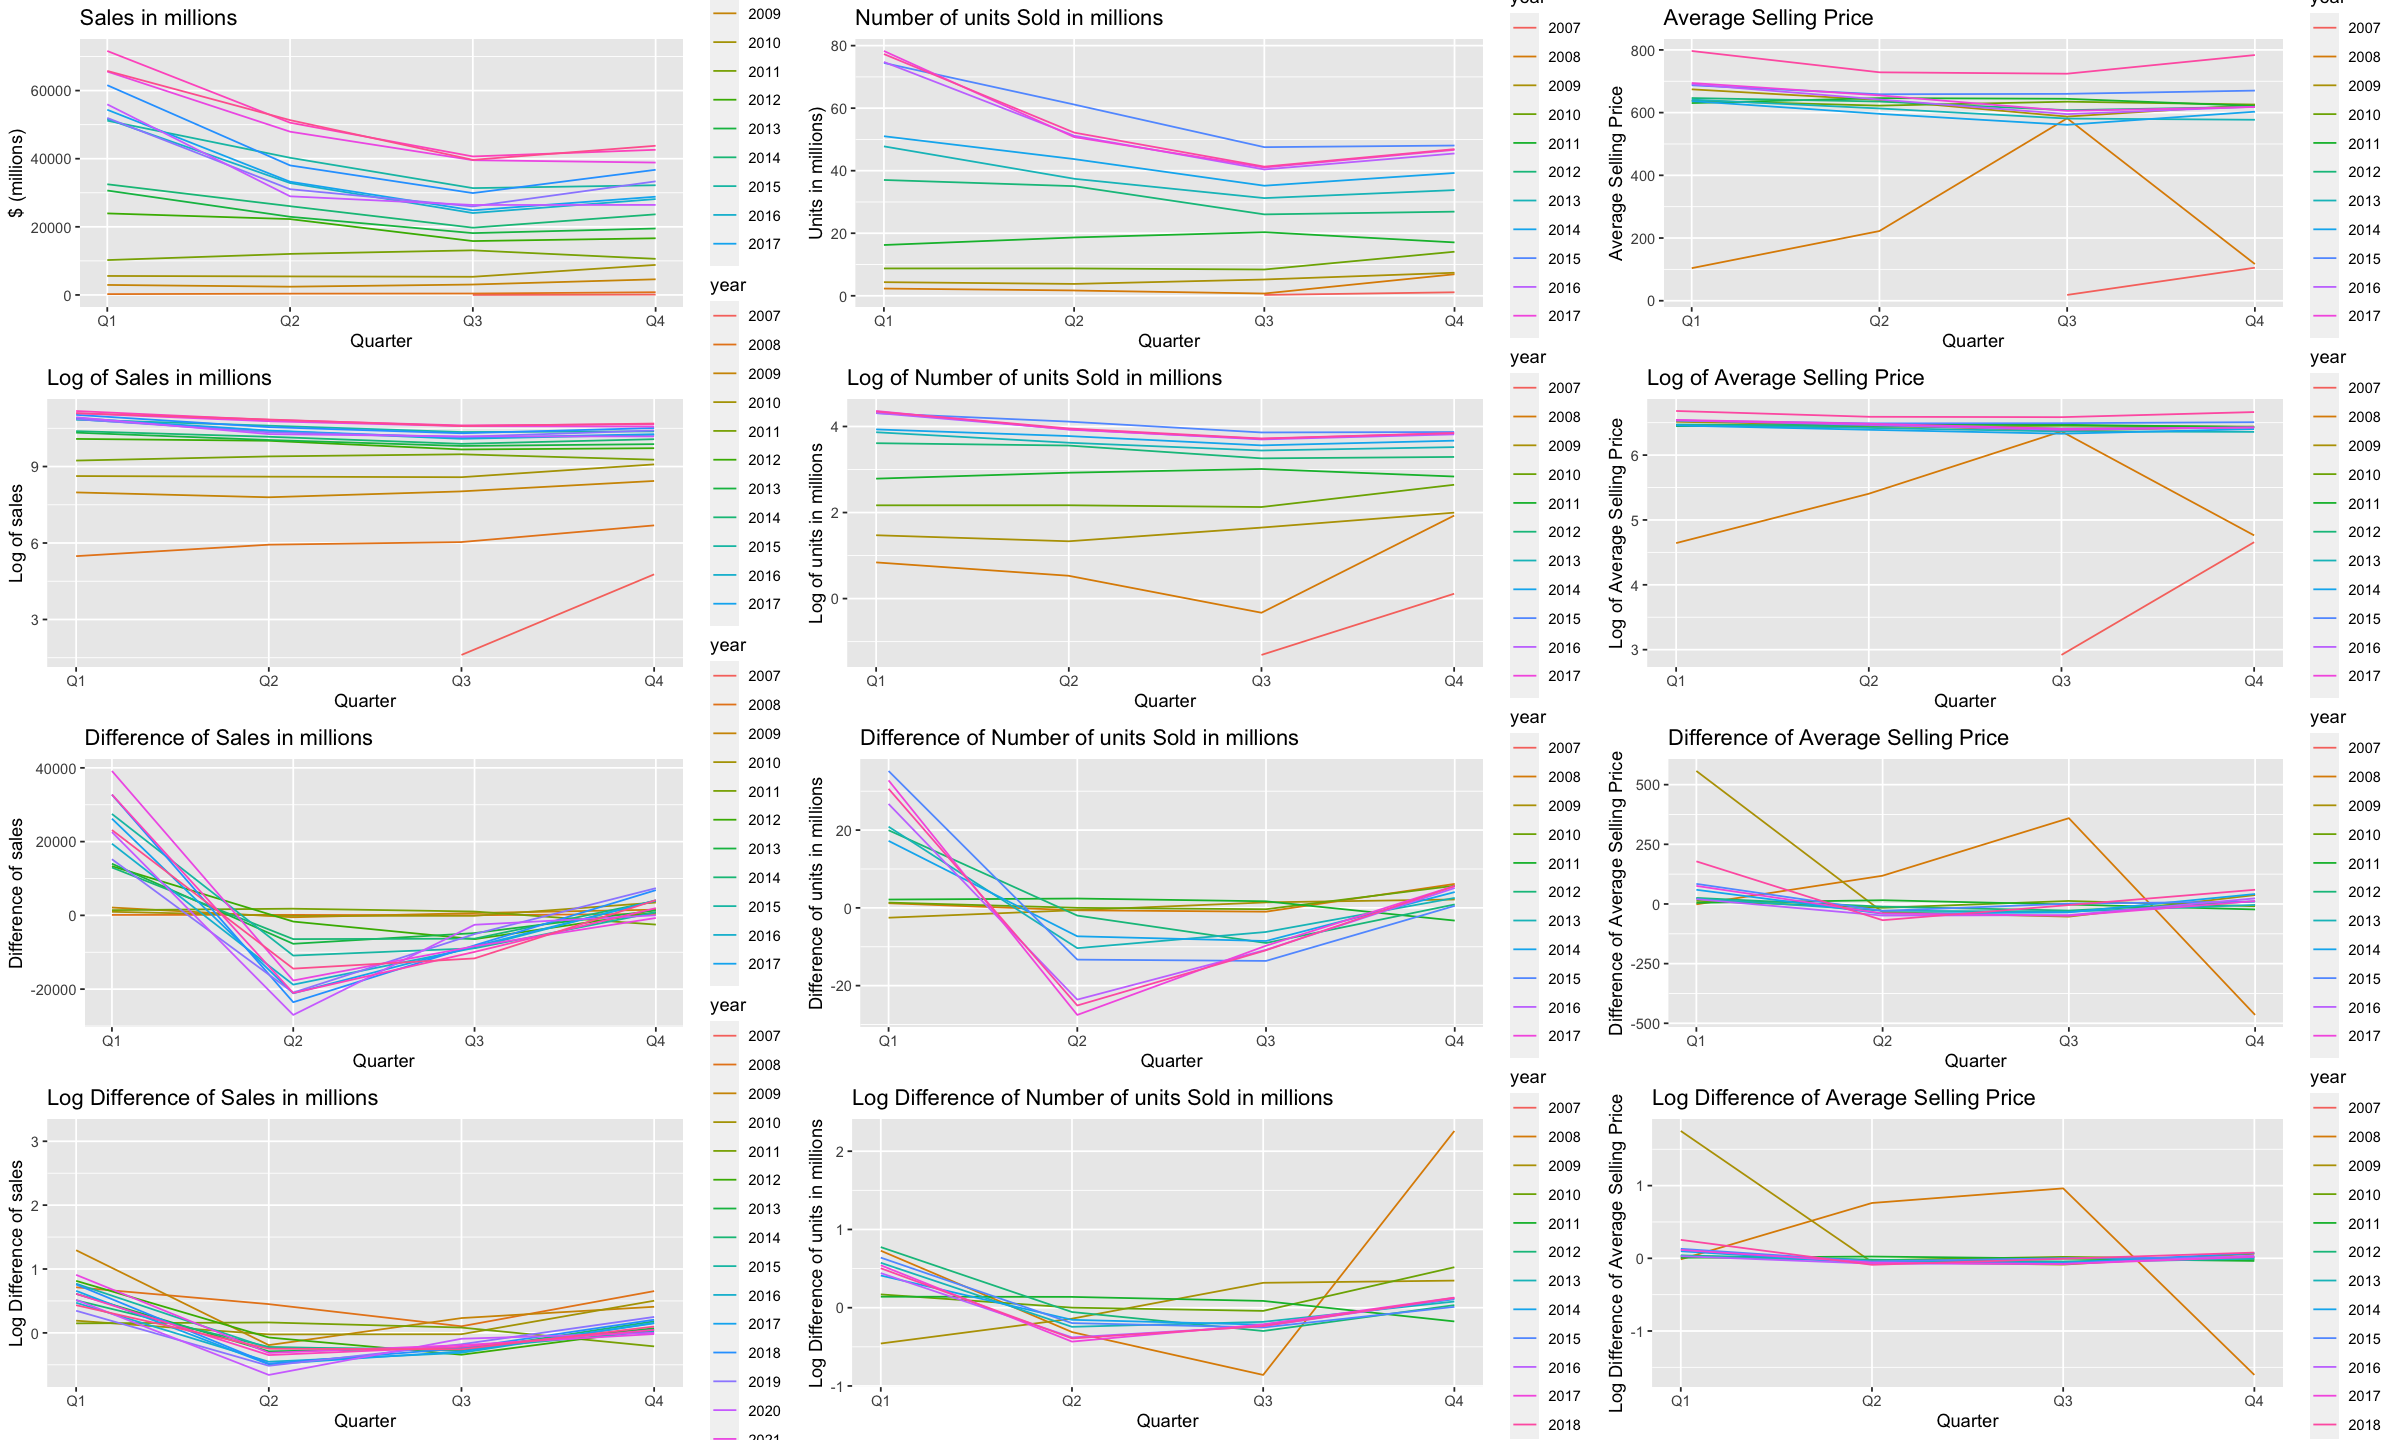

In [19]:
#plotting the seasonal plots
arrangeGrob(sales_ggseasonplot, units_ggseasonplot, avg_sp_ggseasonplot,
            log_sale_ggseasonplot, log_units_ggseasonplot, log_avg_sp_ggseasonplot,
            diff_sale_ggseasonplot, diff_units_ggseasonplot, diff_avg_sp_ggseasonplot,
            log_diff_sale_ggseasonplot, log_diff_units_ggseasonplot,log_diff_avg_sp_ggseasonplot, ncol=3) %>% plot()

In [20]:
salestrendmodel <- tslm(ts_sales ~ trend) %>% 
    predict(ts_sales) %>% 
    ts(start=start(ts_sales), frequency=frequency(ts_sales))

unitstrendmodel <- tslm(ts_units ~ trend) %>% 
    predict(ts_units) %>% 
    ts(start=start(ts_units), frequency=frequency(ts_units))

avg_sptrendmodel <- tslm(ts_avg_sp ~ trend) %>% 
    predict(ts_avg_sp) %>% 
    ts(start=start(ts_avg_sp), frequency=frequency(ts_avg_sp))

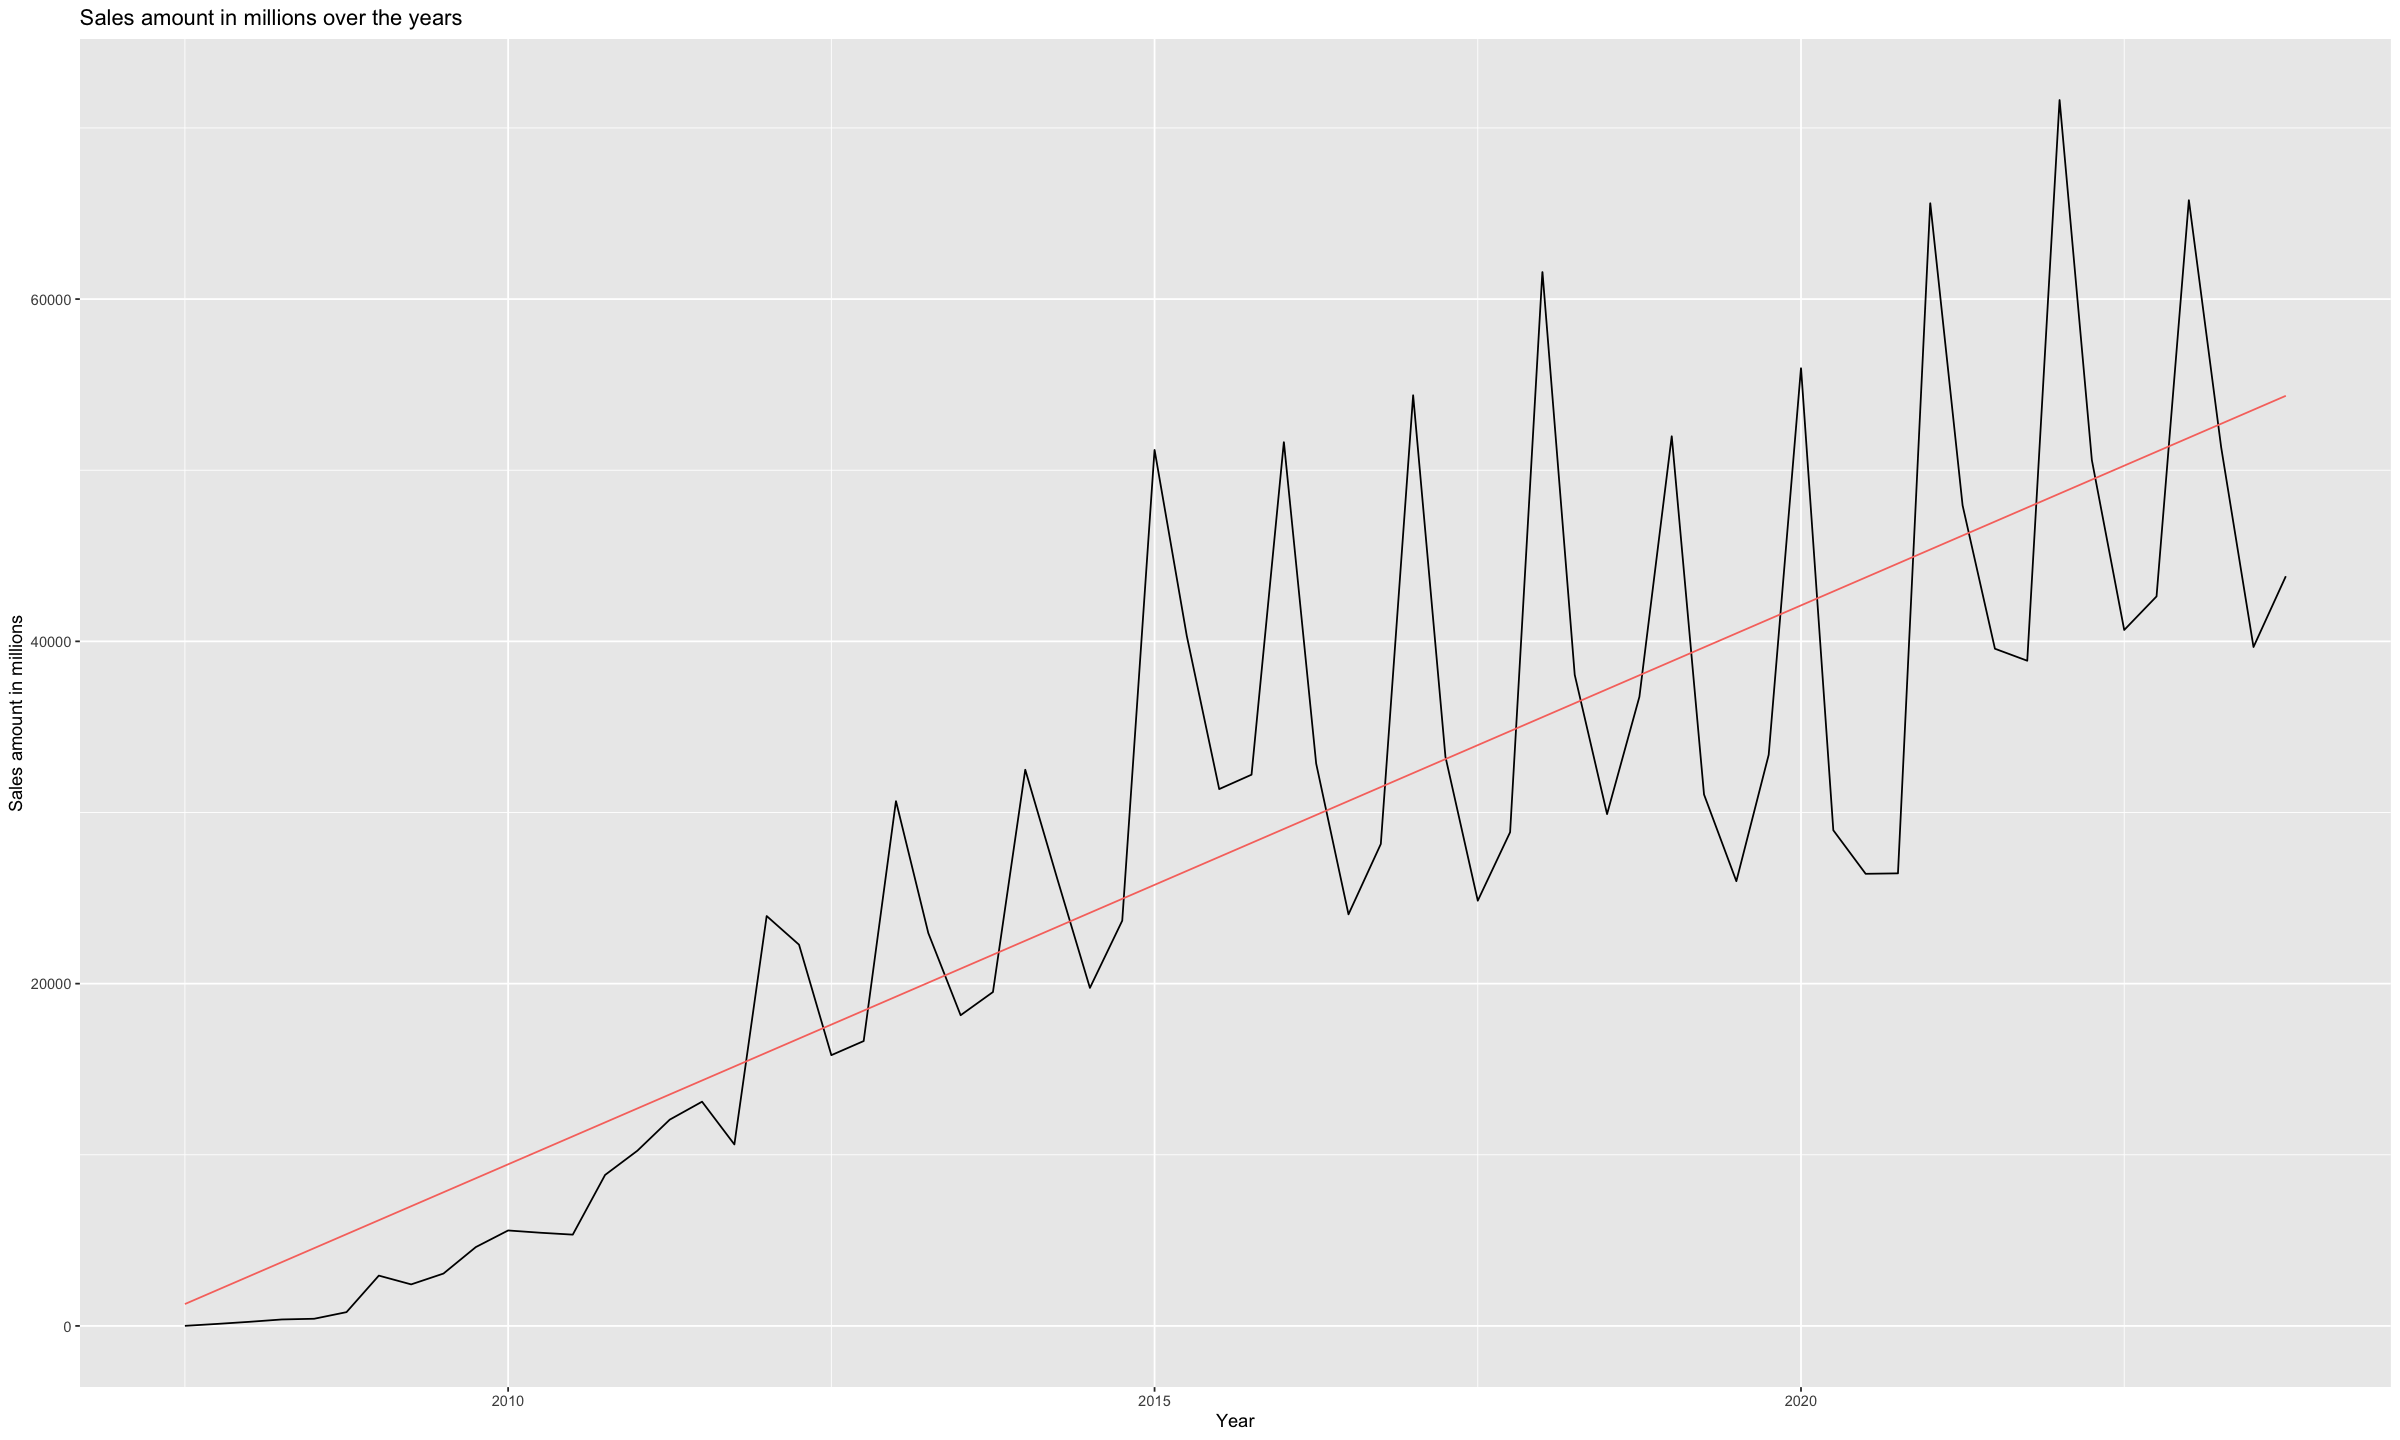

In [21]:
ts_sales %>% autoplot() +
    autolayer(salestrendmodel, series='Linear Trend') +
    theme(legend.position="none") +
    ggtitle('Sales amount in millions over the years') + labs(y = "Sales amount in millions", x = "Year")

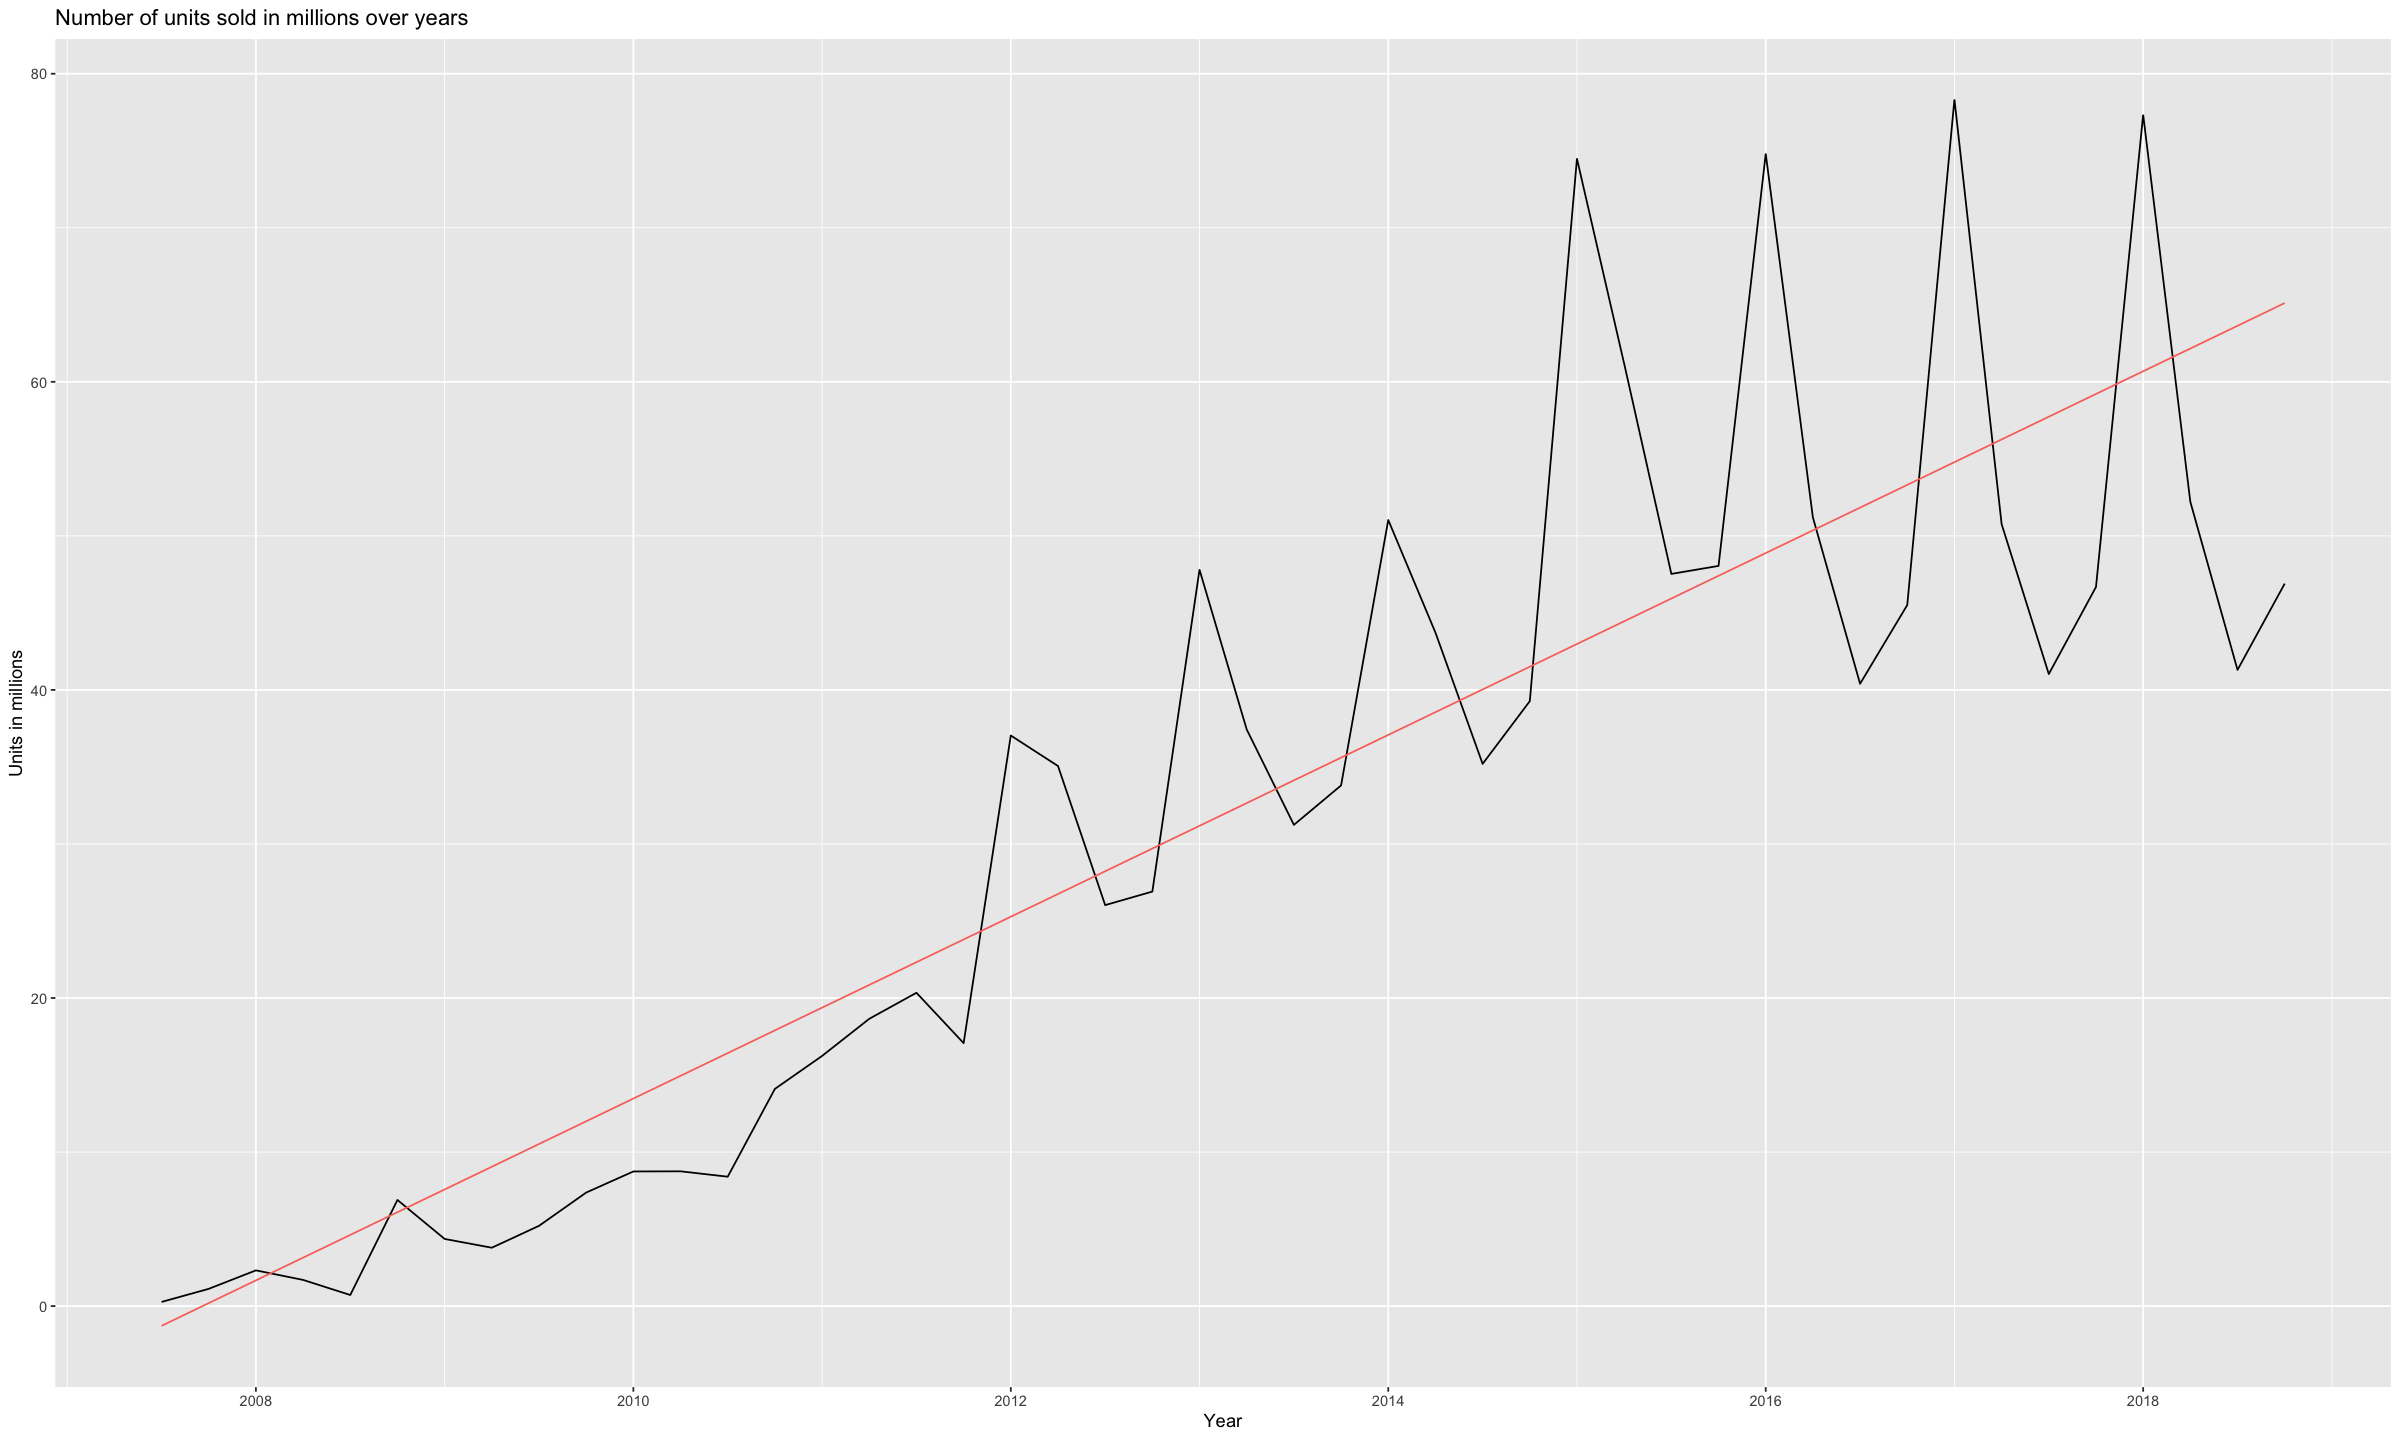

In [22]:
ts_units %>% autoplot() +
    autolayer(unitstrendmodel, series='Linear Trend') +
    theme(legend.position="none") +
    ggtitle('Number of units sold in millions over years') + labs(y = "Units in millions", x = "Year")

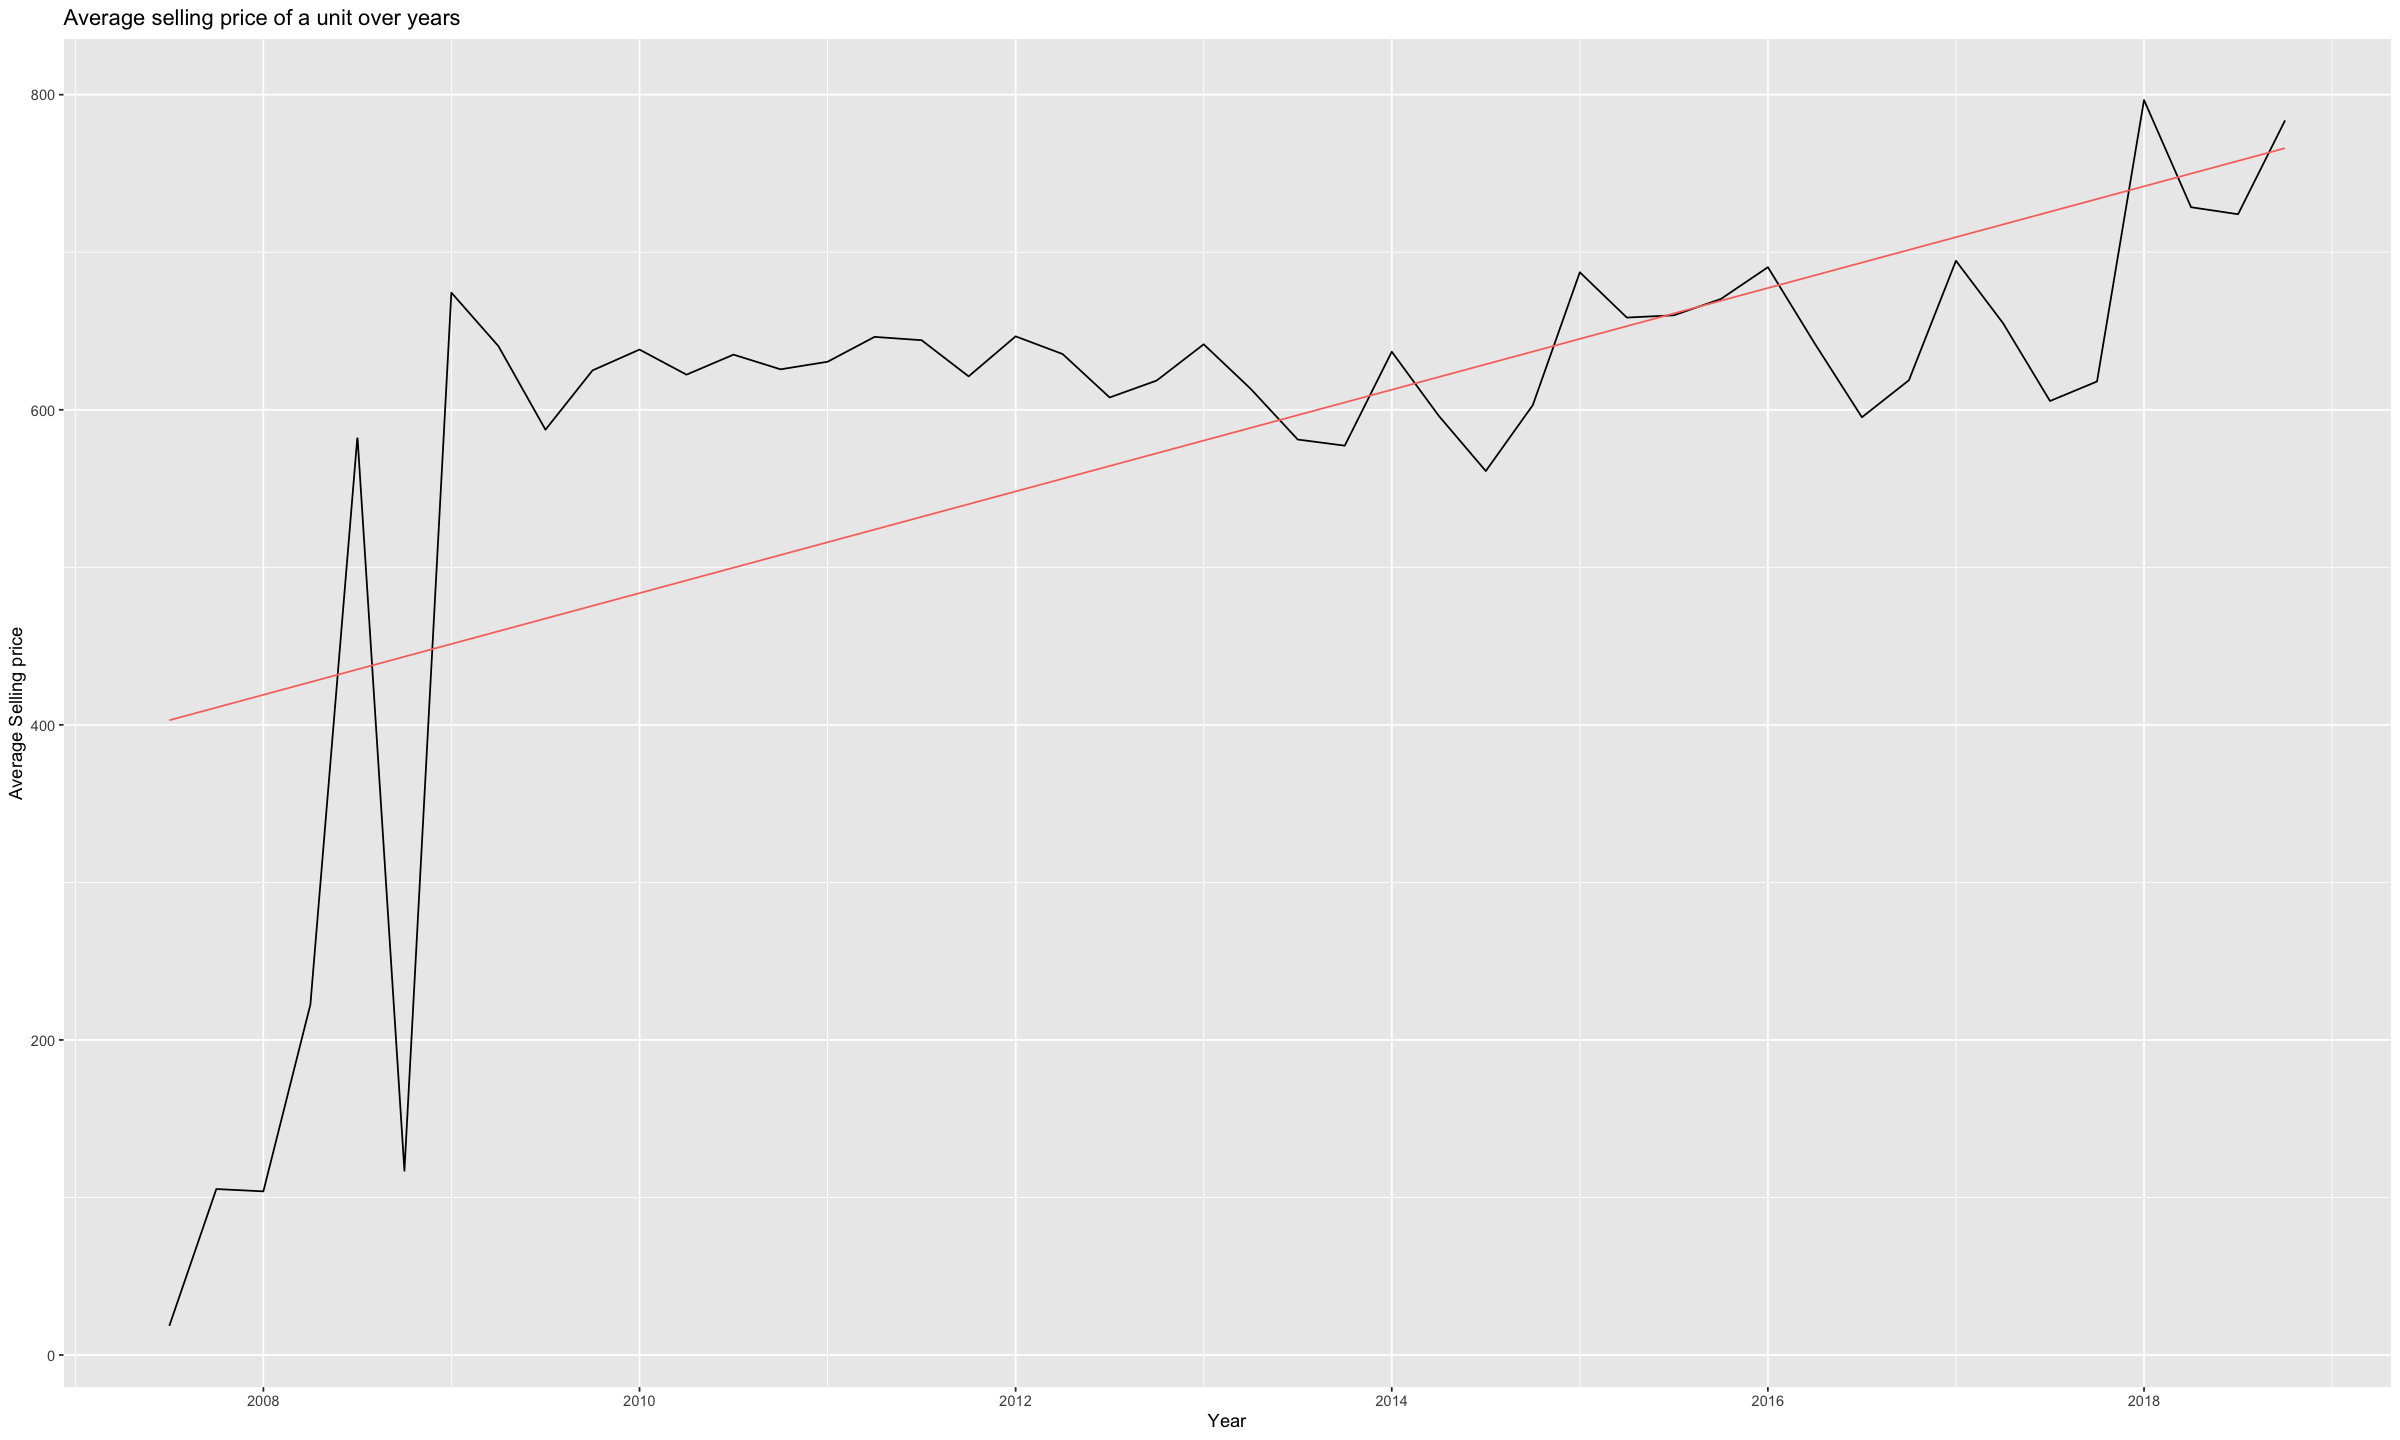

In [23]:
ts_avg_sp %>% autoplot() +
    autolayer(avg_sptrendmodel, series='Linear Trend') +
    theme(legend.position="none") +
    ggtitle('Average selling price of a unit over years') + labs(y = "Average Selling price", x = "Year")

From the above plots, we can see that the data from 2007 Q3 to 2008 Q4 is not in the trend and it's values are low. So, I'm considering the data from 2009 Q1, for futher predictions and the forcasting. 

## Splitting the data to train and test

In [24]:
ts_apple_data <- apple_data %>%
  mutate(Quarters = yearquarter(Quarters)) %>%
  as_tsibble(index = Quarters)

ts_apple_data %>% head()

Quarters,Sales_in_millions,Units_in_millions,Avg_Selling_Price
<qtr>,<int>,<dbl>,<dbl>
2007 Q3,5,0.27,18.51852
2007 Q4,118,1.12,105.35714
2008 Q1,241,2.32,103.87931
2008 Q2,378,1.70,222.35294
2008 Q3,419,0.72,581.94444
2008 Q4,806,6.89,116.98113


In [25]:
ts_apple_data_18 <- ts_apple_data%>% filter_index('2009 Qtr1' ~ '2018 Qtr4')
ts_apple_data_18 %>% tail()

Quarters,Sales_in_millions,Units_in_millions,Avg_Selling_Price
<qtr>,<int>,<dbl>,<dbl>
2017 Q3,24846,41.03,605.5569
2017 Q4,28846,46.68,617.9520
2018 Q1,61576,77.30,796.5847
2018 Q2,38032,52.20,728.5824
2018 Q3,29906,41.30,724.1162
2018 Q4,36755,46.90,783.6887


Considered data from 2009 to 2016 as train data and 2017 to 2018 as test data.

In [26]:
#Splitting data
ts_apple_data_tr <- ts_apple_data_18%>% filter_index('2009 Qtr1' ~ '2016 Qtr4')
ts_apple_data_ts <- ts_apple_data_18%>%filter_index('2017 Qtr1' ~ .)

In [27]:
#Checking the tail data for null values
ts_apple_data_ts |> tail()

Quarters,Sales_in_millions,Units_in_millions,Avg_Selling_Price
<qtr>,<int>,<dbl>,<dbl>
2017 Q3,24846,41.03,605.5569
2017 Q4,28846,46.68,617.9520
2018 Q1,61576,77.30,796.5847
2018 Q2,38032,52.20,728.5824
2018 Q3,29906,41.30,724.1162
2018 Q4,36755,46.90,783.6887


In [28]:
options(repr.plot.width=10, repr.plot.height=6)

## Creating and evaluating different models

From the visualization plots, the plots of `Average Selling Price` looks decomposed and mostly stationary. So I will be predicting the Average Selling price values first and calculate the missing values of `units in millions`. 

In [29]:
ts_apple_data_tr_mdl1 <- ts_apple_data_tr |>
model(
    'Mean Model' = MEAN(Avg_Selling_Price),
    'NAIVE Model' = NAIVE(Avg_Selling_Price),
    'SNAIVE Model' = SNAIVE(Avg_Selling_Price ~ lag('1 year')),
    'Random Walk' = RW(Avg_Selling_Price ~ drift()),
    'ES' = ETS(Avg_Selling_Price),
    'Seasonal Trend' = TSLM(Avg_Selling_Price ~ trend() + season()),
    #'Seasonal Trend with Sales' = TSLM(Avg_Selling_Price ~ trend() + season() + Sales_in_millions)
)

ts_apple_data_tr_mdl1 |> accuracy() |> select(.model, ME, RMSE, MAPE, ACF1)

.model,ME,RMSE,MAPE,ACF1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mean Model,0.000000e+00,30.38516,3.830755,0.41149406
NAIVE Model,-1.791833e+00,32.44009,4.257684,-0.05266140
SNAIVE Model,6.924620e-01,37.09969,4.484610,0.61647190
Random Walk,-2.532741e-14,32.39057,4.241509,-0.05266140
ES,-4.964084e-01,21.85653,2.903298,0.05195868
Seasonal Trend,-8.437695e-15,24.80548,3.260300,0.59484791


Low RMSE for ES model and seasonal trend model.

In [30]:
ts_apple_data_tr_mdl1 |> report() |>
select(.model, r_squared, AICc)

Warning message in report.mdl_df(ts_apple_data_tr_mdl1):
"Model reporting is only supported for individual models, so a glance will be shown. To see the report for a specific model, use `select()` and `filter()` to identify a single model."


.model,r_squared,AICc
<chr>,<dbl>,<dbl>
Mean Model,NA,NA
NAIVE Model,NA,NA
SNAIVE Model,NA,NA
Random Walk,NA,NA
ES,NA,326.9782
Seasonal Trend,0.333543,220.8681


AICc is minimum for Seasonal trend model.

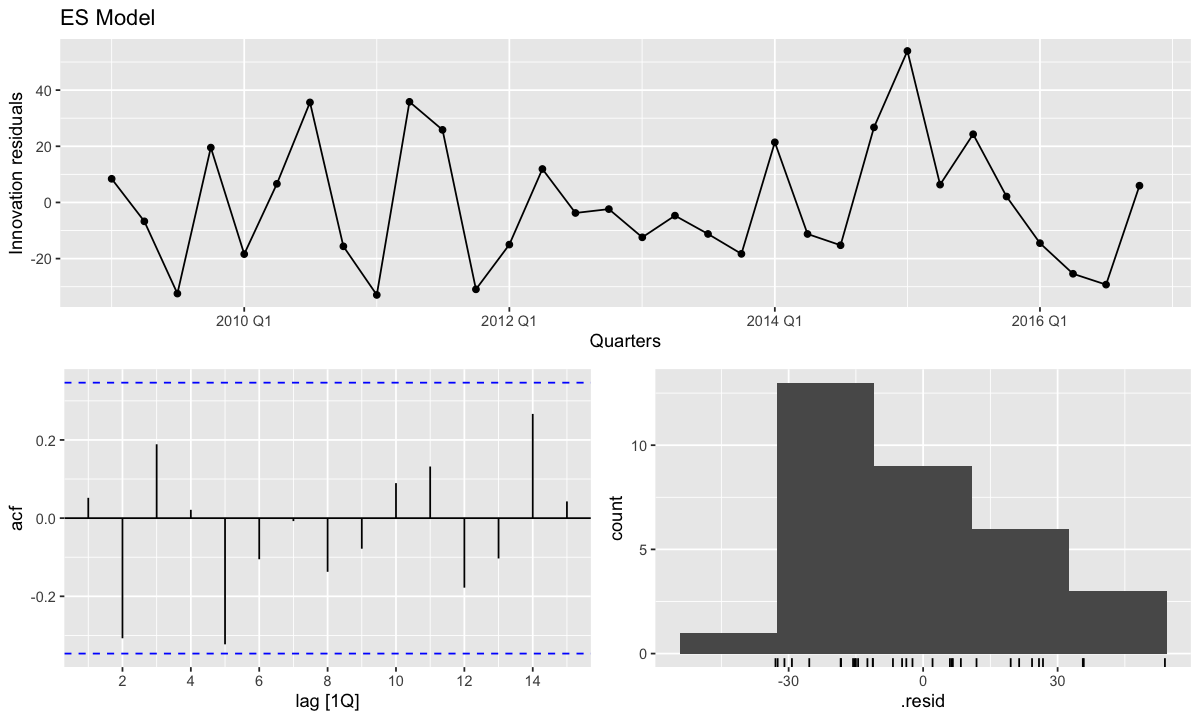

In [31]:
ts_apple_data_tr_mdl1 |> select(`ES`) |> gg_tsresiduals() + ggtitle('ES Model')

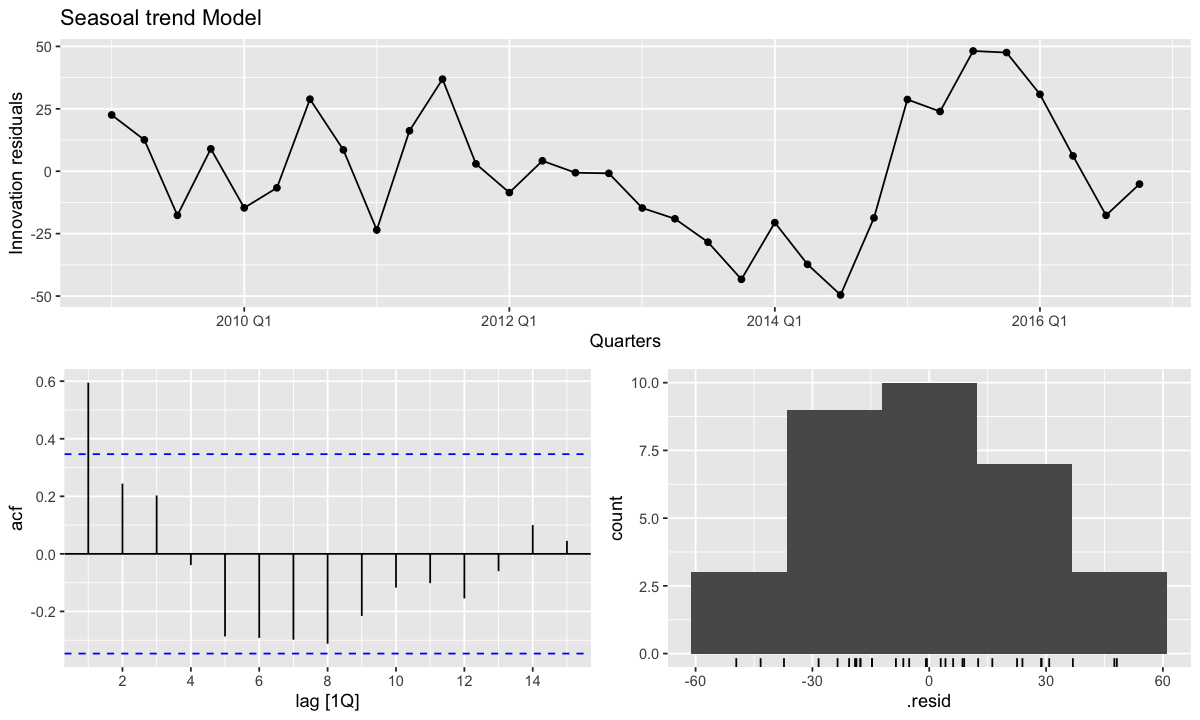

In [32]:
ts_apple_data_tr_mdl1 |> select(`Seasonal Trend`) |> gg_tsresiduals() + ggtitle('Seasoal trend Model')

Warning message:
"Removed 4 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 4 rows containing non-finite values (`stat_bin()`)."


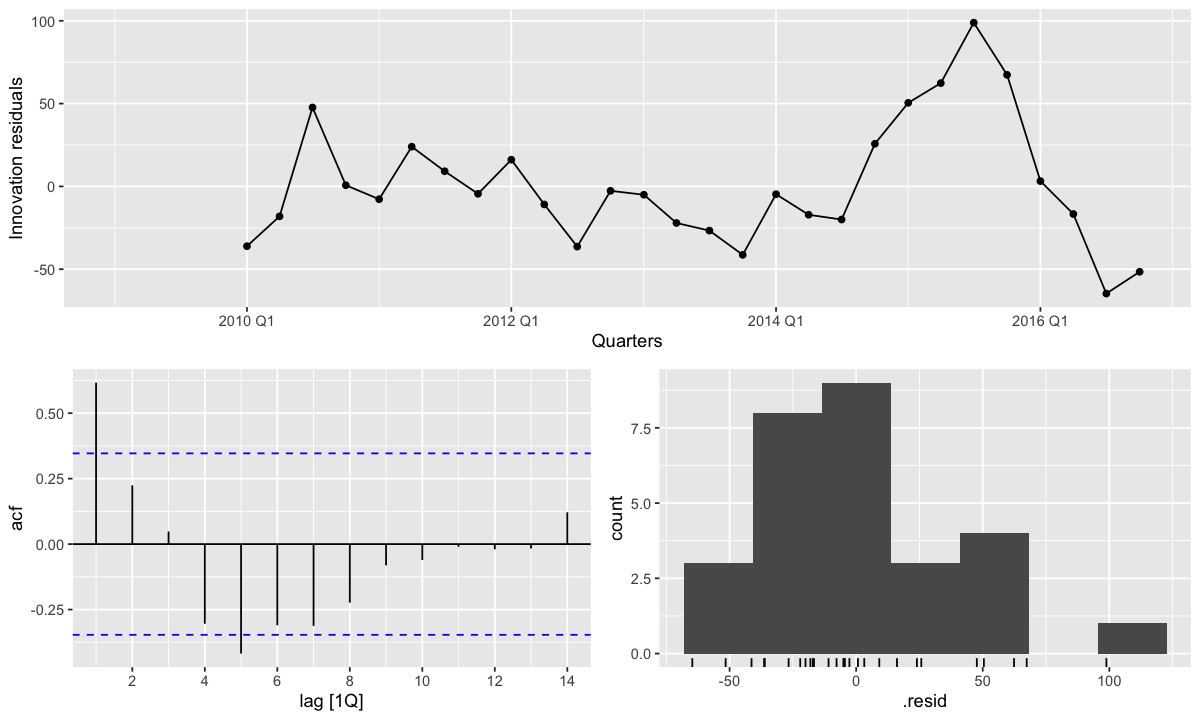

In [33]:
ts_apple_data_tr_mdl1 |> select(`SNAIVE Model`) |> gg_tsresiduals()

In [34]:
ts_apple_data_tr_mdl1_forecasts1 <- ts_apple_data_tr_mdl1 |>
forecast(ts_apple_data_ts)

ts_apple_data_tr_mdl1_forecasts1 |>
accuracy(ts_apple_data_ts) |>
select(.model, ME, RMSE, MAPE, ACF1)

.model,ME,RMSE,MAPE,ACF1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ES,75.06893,96.95606,9.995964,0.4148729
Mean Model,71.65756,97.79347,10.825222,0.2776899
NAIVE Model,81.99440,105.60226,11.468907,0.2776899
Random Walk,90.05765,113.55953,12.340865,0.3114291
SNAIVE Model,64.16741,88.65628,8.561562,0.5180763
Seasonal Trend,66.00238,89.86410,9.333059,0.4102494


From the above metrics we could see that `Seasonal naive` model has least errors marginally after Seasonal trend model.

Warning message:
"Removed 20 rows containing missing values (`geom_line()`)."


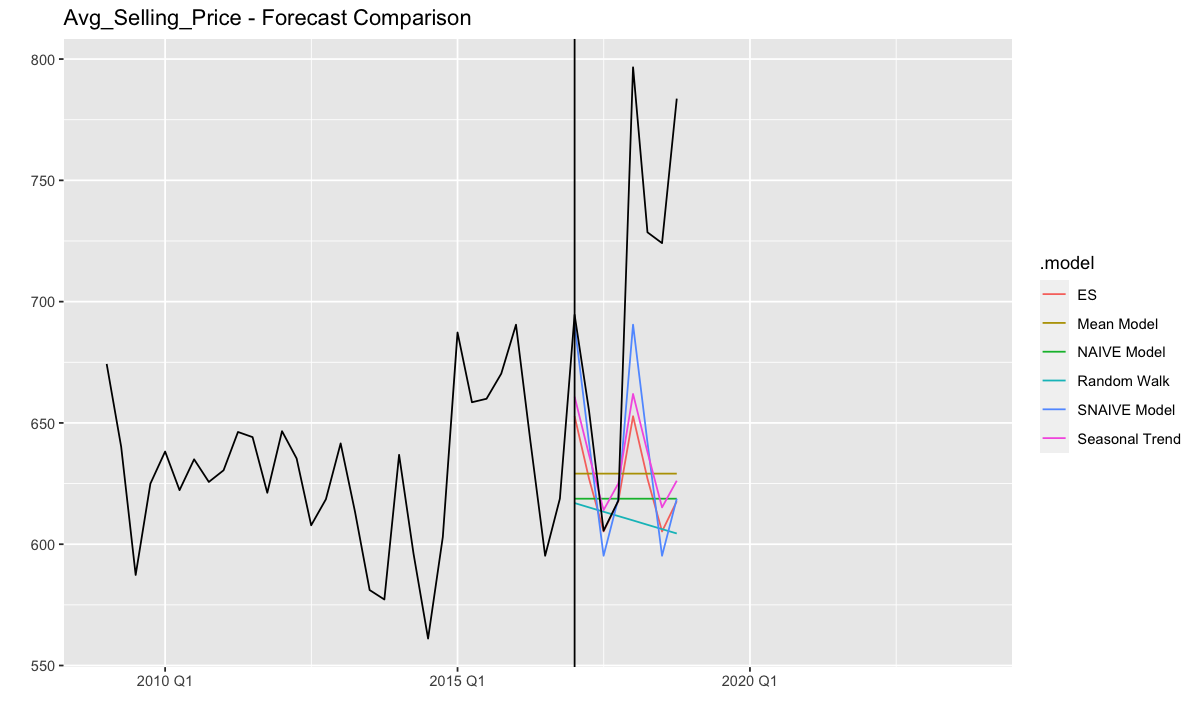

In [35]:
ts_apple_data_tr_mdl1_forecasts1 |>
autoplot(level=NULL) +
autolayer(ts_apple_data |> filter_index('2009 Q1' ~ .), Avg_Selling_Price) +
geom_vline(xintercept = as.Date('2017-01-01')) +
labs(title='Avg_Selling_Price - Forecast Comparison', x='', y='')

From the above graph we could see that the predicted values' plot of Seasonal trend looks more correlated with the original data. The sudden raise in the original data is beacause of the raise in the selling prices.

In [36]:
# Predicted Average selling price with seasonal trend
ts_apple_data_forecasts1 <- ts_apple_data_tr_mdl1_forecasts1 |>
filter(.model == 'Seasonal Trend') |>
as.data.frame() |>
select(Quarters, .mean) |>
rename(Avg_Selling_Price = .mean) |>
as_tsibble(index=Quarters)

ts_apple_data_forecasts1

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2017 Q1,660.8120
2017 Q2,636.8548
2017 Q3,614.0536
2017 Q4,625.0460
2018 Q1,661.9431
2018 Q2,637.9858
2018 Q3,615.1847
2018 Q4,626.1770


In [37]:
total_sp <- ts_apple_data_tr |>
select(Quarters, Avg_Selling_Price) |>
bind_rows(ts_apple_data_forecasts1)

total_sp |> tail(10)

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2016 Q3,595.2475
2016 Q4,618.7651
2017 Q1,660.8120
2017 Q2,636.8548
2017 Q3,614.0536
2017 Q4,625.0460
2018 Q1,661.9431
2018 Q2,637.9858
2018 Q3,615.1847


## Filling the missing values of Units that are sold from 2019 to 2023

First I need to calculate the corresponding average selling price values.
Forcasting the Average selling price from 2019 Q1 to 2021 Q2

In [38]:
total_sp_forecast2 <- total_sp %>%
model(
    'Seasonal Trend' = TSLM(Avg_Selling_Price ~ trend() + season())
)|>
forecast(h = 10) |>
as.data.frame() |>
select(Quarters, .mean) |>
rename(Avg_Selling_Price = .mean) |>
as_tsibble(index=Quarters)

total_sp_forecast2

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2019 Q1,663.0741
2019 Q2,639.1169
2019 Q3,616.3157
2019 Q4,627.3080
2020 Q1,664.2052
2020 Q2,640.2479
2020 Q3,617.4467
2020 Q4,628.4391
2021 Q1,665.3362


In [39]:
total_sp <- total_sp |>
bind_rows(total_sp_forecast2)

total_sp |> tail(10)

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2019 Q1,663.0741
2019 Q2,639.1169
2019 Q3,616.3157
2019 Q4,627.3080
2020 Q1,664.2052
2020 Q2,640.2479
2020 Q3,617.4467
2020 Q4,628.4391
2021 Q1,665.3362


Now the prediction till 2021 Q2 is done, now split this data to test and train data to check for the efficient model.

In [40]:
total_sp_tr <- total_sp %>% filter_index('2009 Qtr1' ~ '2019 Qtr2')
total_sp_ts <- total_sp %>% filter_index('2019 Qtr3' ~ .)
total_sp_ts

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2019 Q3,616.3157
2019 Q4,627.3080
2020 Q1,664.2052
2020 Q2,640.2479
2020 Q3,617.4467
2020 Q4,628.4391
2021 Q1,665.3362
2021 Q2,641.3789


In [41]:
ts_apple_data_tr_mdl2 <- total_sp_tr |>
model(
    'Mean Model' = MEAN(Avg_Selling_Price),
    'NAIVE Model' = NAIVE(Avg_Selling_Price),
    'SNAIVE Model' = SNAIVE(Avg_Selling_Price ~ lag('1 year')),
    'Random Walk' = RW(Avg_Selling_Price ~ drift()),
    'ES' = ETS(Avg_Selling_Price),
    'Seasonal Trend' = TSLM(Avg_Selling_Price ~ trend() + season())
)

ts_apple_data_tr_mdl2 |> accuracy() |> select(.model, ME, RMSE, MAPE, ACF1)

.model,ME,RMSE,MAPE,ACF1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mean Model,-4.072932e-14,28.14814,3.496602,0.36840213
NAIVE Model,-8.584161e-01,31.28047,4.187534,-0.04973977
SNAIVE Model,4.361371e-01,32.38161,3.578281,0.64053985
Random Walk,1.707036e-14,31.26869,4.181199,-0.04973977
ES,2.226926e-01,19.25712,2.292868,0.03669941
Seasonal Trend,3.775262e-15,21.65200,2.484038,0.59484791


In [42]:
ts_apple_data_tr_mdl2 |> report() |>
select(.model, r_squared, AICc)

Warning message in report.mdl_df(ts_apple_data_tr_mdl2):
"Model reporting is only supported for individual models, so a glance will be shown. To see the report for a specific model, use `select()` and `filter()` to identify a single model."


.model,r_squared,AICc
<chr>,<dbl>,<dbl>
Mean Model,NA,NA
NAIVE Model,NA,NA
SNAIVE Model,NA,NA
Random Walk,NA,NA
ES,NA,422.7382
Seasonal Trend,0.4083069,272.7082


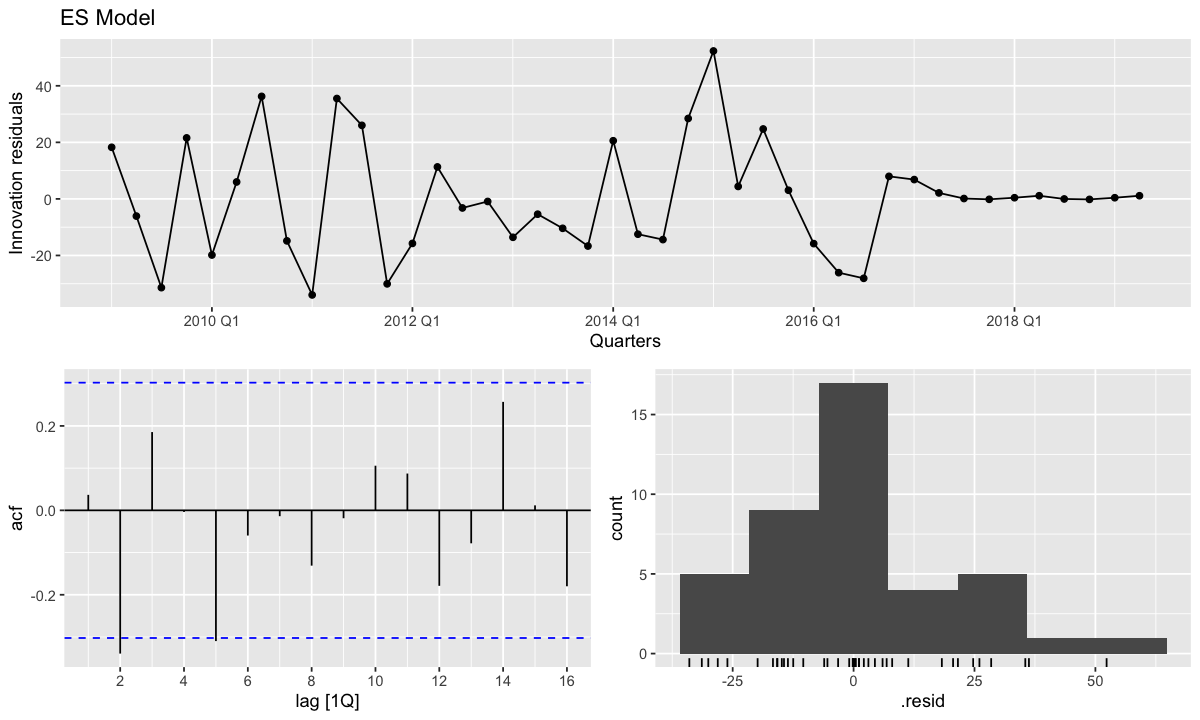

In [43]:
ts_apple_data_tr_mdl2 |> select(`ES`) |> gg_tsresiduals() + ggtitle('ES Model')

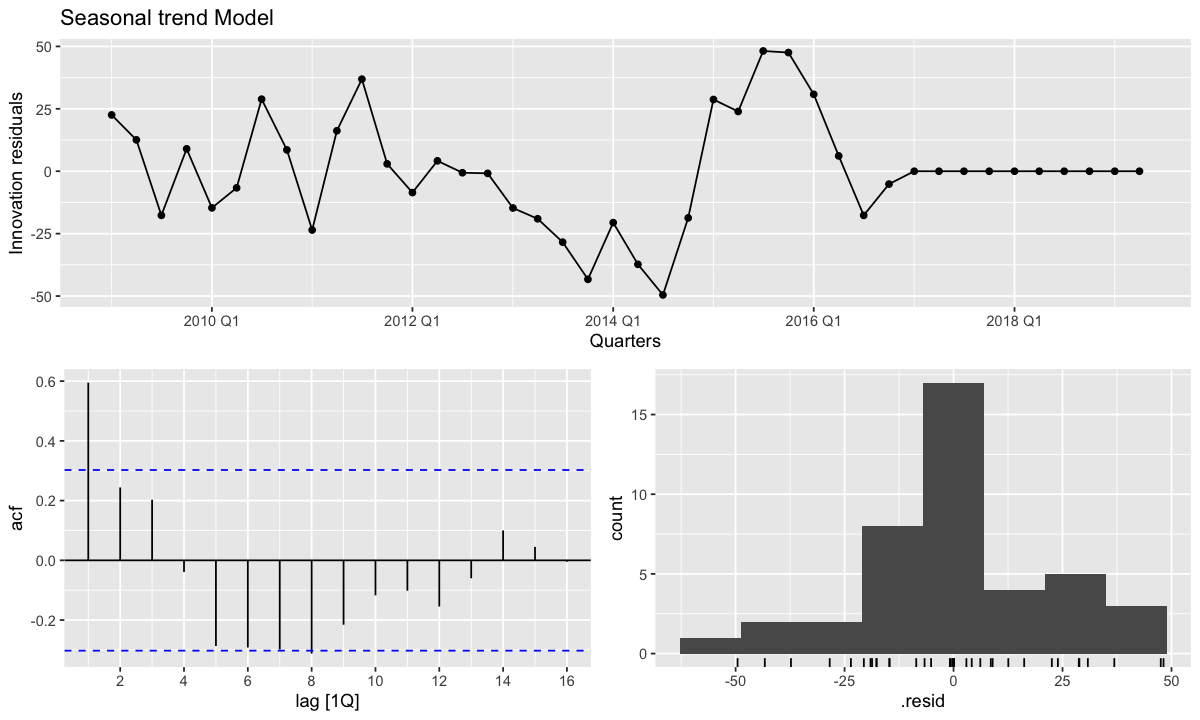

In [44]:
ts_apple_data_tr_mdl2 |> select(`Seasonal Trend`) |> gg_tsresiduals() + ggtitle('Seasonal trend Model')

In [45]:
ts_apple_data_tr_mdl2_forecasts <- ts_apple_data_tr_mdl2 |>
forecast(total_sp_ts)

ts_apple_data_tr_mdl2_forecasts |>
accuracy(total_sp_ts) |>
select(.model, ME, RMSE, MAPE, ACF1)

.model,ME,RMSE,MAPE,ACF1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ES,9.013328e-01,1.212661e+00,1.490535e-01,0.4376368820
Mean Model,6.358283e+00,1.894355e+01,2.350380e+00,-0.0008109914
NAIVE Model,-1.532148e+00,1.791027e+01,2.379760e+00,-0.0008109914
Random Walk,2.330725e+00,1.878827e+01,2.501036e+00,0.0440937791
SNAIVE Model,1.696554e+00,1.788325e+00,2.662180e-01,0.6250000000
Seasonal Trend,7.105427e-14,1.063443e-13,1.131800e-14,0.1895161290


RMSE of the seasonal trend is very low compared to any other model.

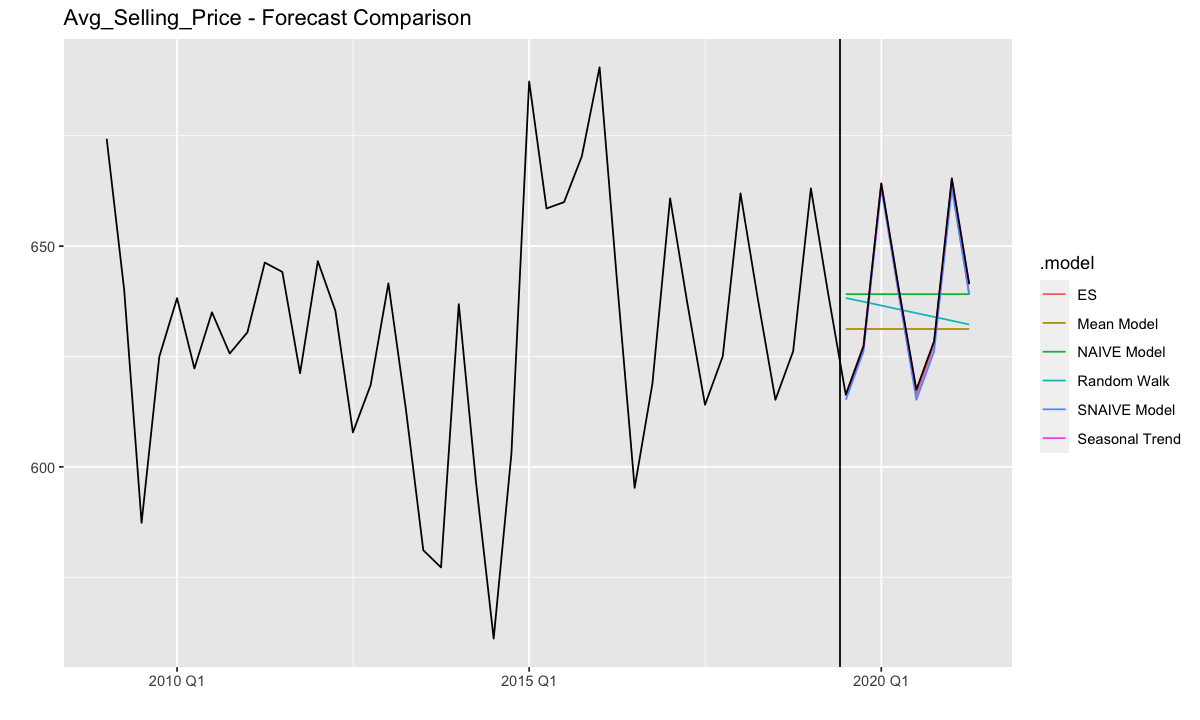

In [46]:
ts_apple_data_tr_mdl2_forecasts |>
autoplot(level=NULL) +
autolayer(total_sp |> filter_index('2009 Q1' ~ .), Avg_Selling_Price) +
geom_vline(xintercept = as.Date('2019-06-01')) +
labs(title='Avg_Selling_Price - Forecast Comparison', x='', y='')

In [47]:
# Predicted Average selling price with same seasonal trend model
total_sp_forecasts <- ts_apple_data_tr_mdl2_forecasts |>
filter(.model == 'Seasonal Trend') |>
as.data.frame() |>
select(Quarters, .mean) |>
rename(Avg_Selling_Price = .mean) |>
as_tsibble(index=Quarters)

total_sp_forecasts

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2019 Q3,616.3157
2019 Q4,627.3080
2020 Q1,664.2052
2020 Q2,640.2479
2020 Q3,617.4467
2020 Q4,628.4391
2021 Q1,665.3362
2021 Q2,641.3789


In [48]:
total_sp |> tail(8)

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2019 Q3,616.3157
2019 Q4,627.3080
2020 Q1,664.2052
2020 Q2,640.2479
2020 Q3,617.4467
2020 Q4,628.4391
2021 Q1,665.3362
2021 Q2,641.3789


As we can see the test data and the predicted data is same because we have used the same model again so now forcasting further till 2023 using the total_sp data.

In [49]:
total_sp_forecast_fnl <- total_sp %>%
model(
    'Seasonal Trend with Sales' = TSLM(Avg_Selling_Price ~ trend() + season())
)|>
forecast(h = 10) |>
as.data.frame() |>
select(Quarters, .mean) |>
rename(Avg_Selling_Price = .mean) |>
as_tsibble(index=Quarters)

total_sp_forecast_fnl

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2021 Q3,618.5778
2021 Q4,629.5701
2022 Q1,666.4672
2022 Q2,642.5100
2022 Q3,619.7088
2022 Q4,630.7012
2023 Q1,667.5983
2023 Q2,643.6410
2023 Q3,620.8399


In [50]:
total_sp <- total_sp |>
bind_rows(total_sp_forecast_fnl)

total_sp |> tail(10)

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2021 Q3,618.5778
2021 Q4,629.5701
2022 Q1,666.4672
2022 Q2,642.5100
2022 Q3,619.7088
2022 Q4,630.7012
2023 Q1,667.5983
2023 Q2,643.6410
2023 Q3,620.8399


Filling the actual data with the new forcasted data.

In [51]:
ts_apple_data_new <- left_join(ts_apple_data, total_sp, by = "Quarters") %>%
  select(Quarters, Sales_in_millions, Units_in_millions, Avg_Selling_Price = Avg_Selling_Price.y)%>%
  mutate(Units_in_millions_New = round(Sales_in_millions / Avg_Selling_Price, digits = 2)) %>%
  select(Quarters, Sales_in_millions, Units_in_millions_New, Avg_Selling_Price )
ts_apple_data_new |> tail(10)

Quarters,Sales_in_millions,Units_in_millions_New,Avg_Selling_Price
<qtr>,<int>,<dbl>,<dbl>
2021 Q3,39570,63.97,618.5778
2021 Q4,38868,61.74,629.5701
2022 Q1,71628,107.47,666.4672
2022 Q2,50570,78.71,642.5100
2022 Q3,40665,65.62,619.7088
2022 Q4,42626,67.59,630.7012
2023 Q1,65775,98.52,667.5983
2023 Q2,51334,79.76,643.6410
2023 Q3,39669,63.90,620.8399


## Sales forcasting for 2024

In [52]:
ts_apple_data_new_tr <- ts_apple_data_new %>% filter_index('2009 Qtr1' ~ '2021 Qtr4')
ts_apple_data_new_ts <- ts_apple_data_new %>% filter_index('2022 Qtr1' ~ '2023 Qtr4')

In [53]:
ts_apple_data_new_mdl <- ts_apple_data_new_tr |>
model(
    'Mean Model' = MEAN(Sales_in_millions),
    'NAIVE Model' = NAIVE(Sales_in_millions),
    'SNAIVE Model' = SNAIVE(Sales_in_millions ~ lag('1 year')),
    'Random Walk' = RW(Sales_in_millions ~ drift()),
    'ES' = ETS(Sales_in_millions),
    'Seasonal Trend' = TSLM(Sales_in_millions ~ trend() + season()),
    'Seasonal Trend with sp' = TSLM(Sales_in_millions ~ trend() + season() + Avg_Selling_Price),
    'Seasonal Trend with Units' = TSLM(Sales_in_millions ~ trend() + season() + Units_in_millions_New),
)

ts_apple_data_new_mdl |> accuracy() |> select(.model, ME, RMSE, MAPE, ACF1)

.model,ME,RMSE,MAPE,ACF1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mean Model,2.168795e-12,15742.5238,119.431002,0.6050549
NAIVE Model,7.044706e+02,13610.9026,29.635896,-0.2514416
SNAIVE Model,3.727917e+03,7456.1871,23.495304,0.5605857
Random Walk,4.235392e-13,13592.6595,29.790268,-0.2514416
ES,-2.295167e+02,4769.0266,13.588071,0.2678444
Seasonal Trend,-7.695724e-13,7110.2582,38.791292,0.3860725
Seasonal Trend with sp,-4.897279e-13,6853.6216,41.563130,0.3924669
Seasonal Trend with Units,0.000000e+00,864.6711,4.491315,0.6594793


In [54]:
ts_apple_data_new_mdl |> report() |>
select(.model, r_squared, AICc)

Warning message in report.mdl_df(ts_apple_data_new_mdl):
"Model reporting is only supported for individual models, so a glance will be shown. To see the report for a specific model, use `select()` and `filter()` to identify a single model."


.model,r_squared,AICc
<chr>,<dbl>,<dbl>
Mean Model,NA,NA
NAIVE Model,NA,NA
SNAIVE Model,NA,NA
Random Walk,NA,NA
ES,NA,1080.3440
Seasonal Trend,0.7960038,936.2732
Seasonal Trend with sp,0.8104641,935.1288
Seasonal Trend with Units,0.9969832,719.8298


In [55]:
ts_apple_data_new_mdl_forecast <- ts_apple_data_new_mdl |>
forecast(ts_apple_data_new_ts)

ts_apple_data_new_mdl_forecast |>
accuracy(ts_apple_data_new_ts) |>
select(.model, ME, RMSE, MAPE, ACF1)

.model,ME,RMSE,MAPE,ACF1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ES,-2434.7837,4502.9531,5.8083678,0.15598026
Mean Model,23304.4615,25849.3857,43.5441072,0.03728253
NAIVE Model,11891.0000,16324.4814,20.0741383,0.03728253
Random Walk,8720.8824,14860.8601,16.4625193,0.08536431
SNAIVE Model,2765.7500,3438.2089,5.4424492,-0.40570742
Seasonal Trend,-1623.7871,5594.8986,9.4965181,0.24238792
Seasonal Trend with Units,141.2419,480.3875,0.6201096,0.01653772
Seasonal Trend with sp,-1623.7871,5594.8986,9.4965181,0.24238792


Forcasting Sales_in_millions with different models.

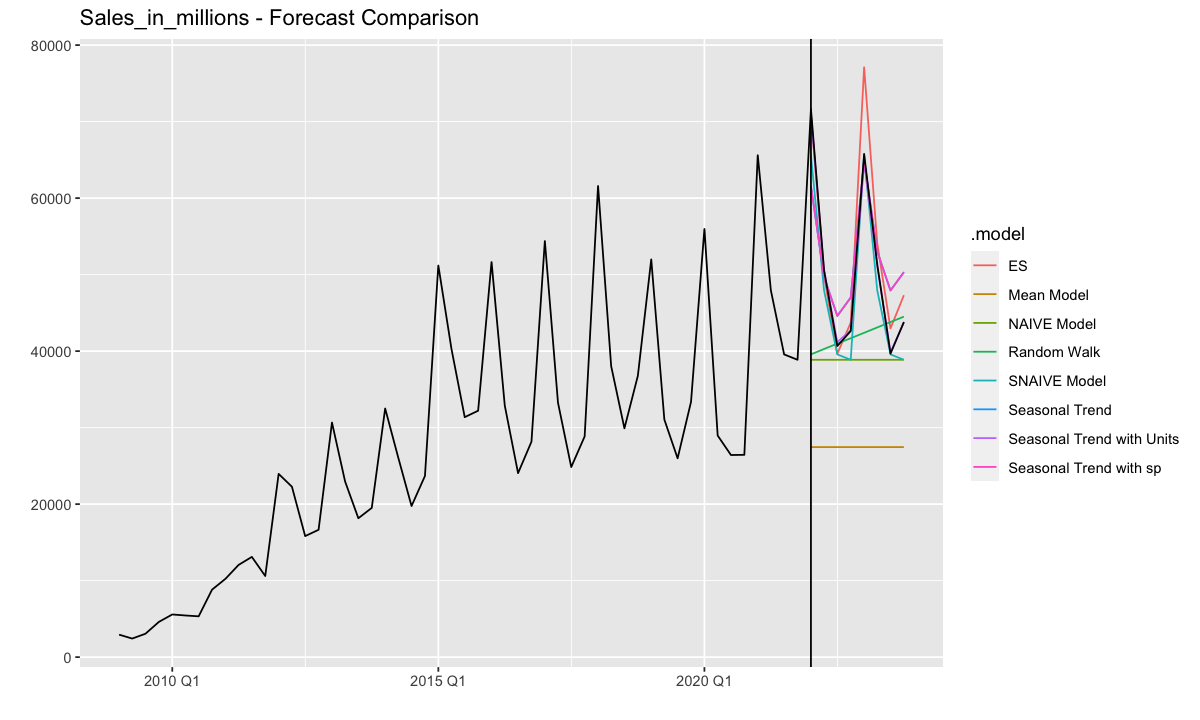

In [56]:
ts_apple_data_new_mdl_forecast |>
autoplot(level=NULL) +
autolayer(ts_apple_data_new |> filter_index('2009 Q1' ~ .), Sales_in_millions) +
geom_vline(xintercept = as.Date('2022-01-01')) +
labs(title='Sales_in_millions - Forecast Comparison', x='', y='')

In [57]:
# forecasted values of Avg_selling_price using Seasonal trend model 
sp_forecast_fnl <- ts_apple_data_new %>%
model(
    'Seasonal Trend' = TSLM(Avg_Selling_Price ~ trend() + season()),
)|>
forecast(h = 4) |>
as.data.frame() |>
select(Quarters, .mean) |>
rename(Avg_Selling_Price = .mean) |>
as_tsibble(index=Quarters)

sp_forecast_fnl

Quarters,Avg_Selling_Price
<qtr>,<dbl>
2024 Q1,668.7293
2024 Q2,644.7720
2024 Q3,621.9709
2024 Q4,632.9632


In [58]:
# forecasted values of Units_in_millions sold using Seasonal trend model 
units_forecast_fnl <- ts_apple_data_new %>%
model(
    'Seasonal Trend' = TSLM(Units_in_millions_New ~ trend() + season()),
)|>
forecast(h = 4) |>
as.data.frame() |>
select(Quarters, .mean) |>
rename(Units_in_millions_New = .mean) |>
as_tsibble(index=Quarters)

units_forecast_fnl

Quarters,Units_in_millions_New
<qtr>,<dbl>
2024 Q1,103.73040
2024 Q2,86.50507
2024 Q3,78.72174
2024 Q4,81.98774


Forecasting the revenue sales for different models

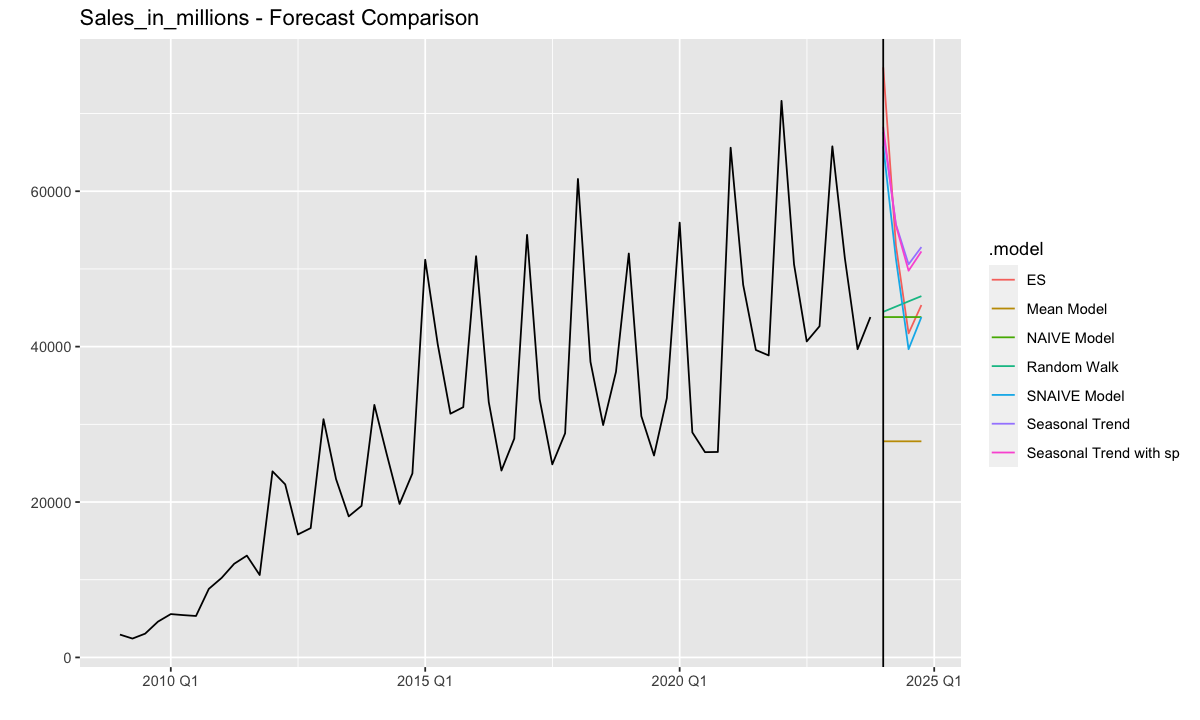

In [59]:
ts_apple_data_future_mdl_forecast <- ts_apple_data_new |>
model(
    'Mean Model' = MEAN(Sales_in_millions),
    'NAIVE Model' = NAIVE(Sales_in_millions),
    'SNAIVE Model' = SNAIVE(Sales_in_millions ~ lag('1 year')),
    'Random Walk' = RW(Sales_in_millions ~ drift()),
    'ES' = ETS(Sales_in_millions),
    'Seasonal Trend' = TSLM(Sales_in_millions ~ trend() + season()),
    'Seasonal Trend with sp' = TSLM(Sales_in_millions ~ trend() + season() + Avg_Selling_Price),
    #'Seasonal Trend with Units' = TSLM(Sales_in_millions ~ trend() + season() + Units_in_millions_New),
)|>
forecast(sp_forecast_fnl)

ts_apple_data_future_mdl_forecast |>
autoplot(level = NULL) +
autolayer(ts_apple_data_new |> filter_index('2009 Q1' ~ .), Sales_in_millions) +
geom_vline(xintercept = as.Date('2024-01-01')) +
labs(title='Sales_in_millions - Forecast Comparison', x='', y='')

Forecasting using the best model assumed using the error reports

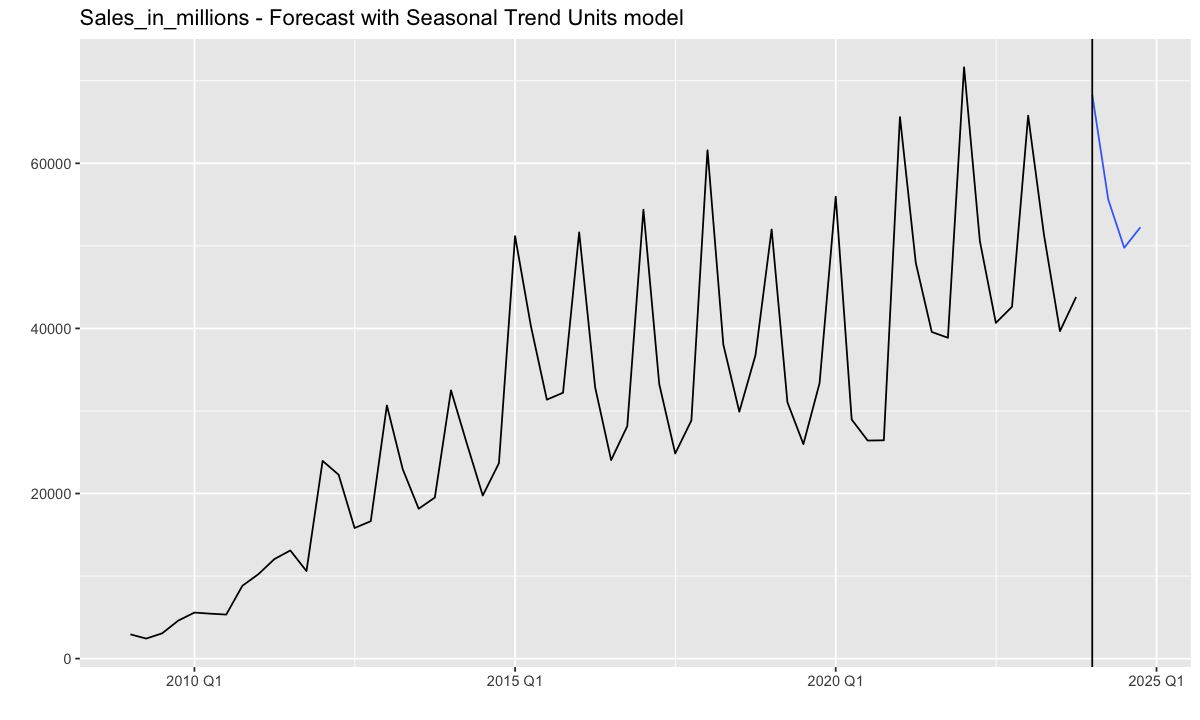

In [60]:
sales_forecast_fnl <- ts_apple_data_new %>%
model(
    'Seasonal Trend with Units' = TSLM(Sales_in_millions ~ trend() + season() + Units_in_millions_New),
)|>
forecast(units_forecast_fnl) 

sales_forecast_fnl |>
autoplot(level = NULL) +
autolayer(ts_apple_data_new |> filter_index('2009 Q1' ~ .), Sales_in_millions) +
geom_vline(xintercept = as.Date('2024-01-01')) +
labs(title='Sales_in_millions - Forecast with Seasonal Trend Units model ', x='', y='')

In [61]:
sp_forecast_fnl1 <- ts_apple_data_new %>%
model(
    'Seasonal Trend with Units' = TSLM(Sales_in_millions ~ trend() + season() + Units_in_millions_New),
)|>
forecast(units_forecast_fnl)|>
as.data.frame() |>
select(Quarters, .mean) |>
rename(Sales_in_millions = .mean) |>
as_tsibble(index=Quarters)

sp_forecast_fnl1

Quarters,Sales_in_millions
<qtr>,<dbl>
2024 Q1,68293.67
2024 Q2,55621.67
2024 Q3,49768.54
2024 Q4,52251.34


In [62]:
forecasted_data <- left_join(sp_forecast_fnl1, units_forecast_fnl, by = "Quarters") %>%
  select(Quarters, Sales_in_millions, Units_in_millions = Units_in_millions_New)%>%
  mutate(Avg_Selling_Price = round(Sales_in_millions / Units_in_millions, digits = 2)) %>%
  select(Quarters, Sales_in_millions, Units_in_millions, Avg_Selling_Price )
forecasted_data |> tail(10)

Quarters,Sales_in_millions,Units_in_millions,Avg_Selling_Price
<qtr>,<dbl>,<dbl>,<dbl>
2024 Q1,68293.67,103.73040,658.38
2024 Q2,55621.67,86.50507,642.99
2024 Q3,49768.54,78.72174,632.21
2024 Q4,52251.34,81.98774,637.31


## Sensitivity Analysis

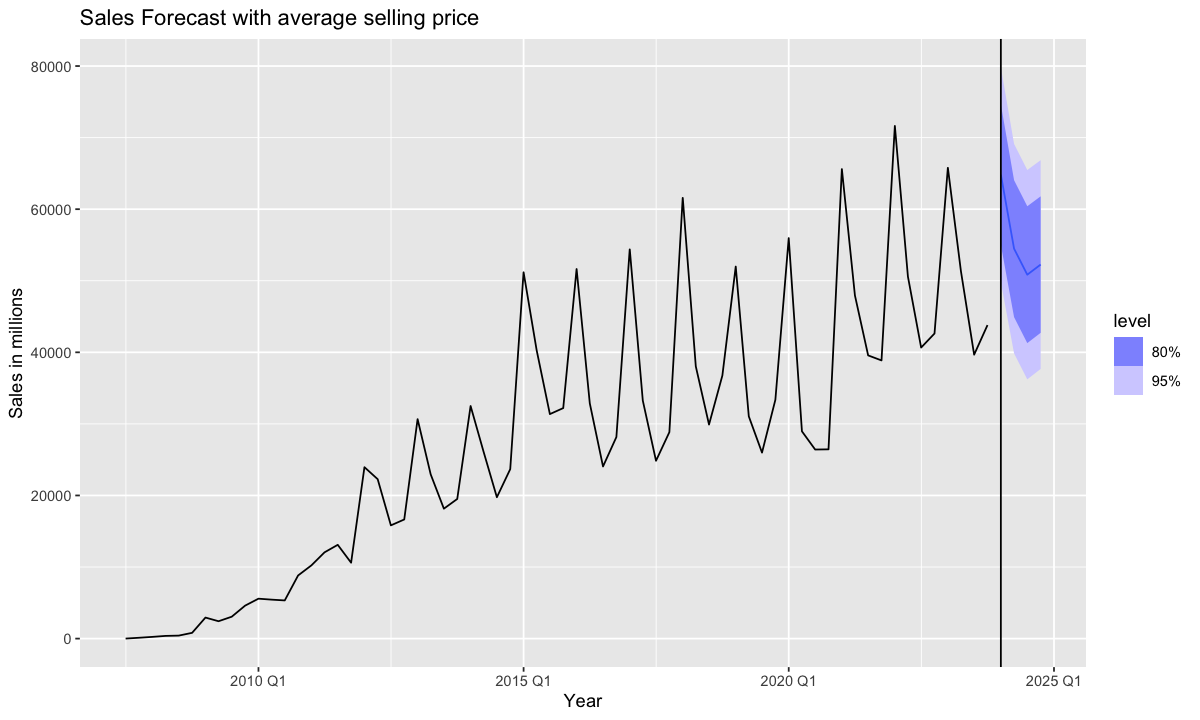

In [63]:
fit_sales_mdl <- ts_apple_data_new|>
  model(TSLM(Sales_in_millions ~ trend() + season() + Avg_Selling_Price))

new_price <- scenarios(
  "Average Selling Price" = new_data(ts_apple_data_new, 4) |>
    mutate(Avg_Selling_Price = (mean(ts_apple_data_new$Avg_Selling_Price, na.rm = TRUE) * 1)),
  names_to = "Scenario"
)

fcast <- forecast(fit_sales_mdl, new_price)

ts_apple_data_new |>
  autoplot(Sales_in_millions) +
  autolayer(fcast) +
  geom_vline(xintercept = as.Date('2024-01-01')) +
  labs(title = "Sales Forecast with average selling price", y = "Sales in millions", x = "Year")

### Scenario with 10% increase in Average Selling Price

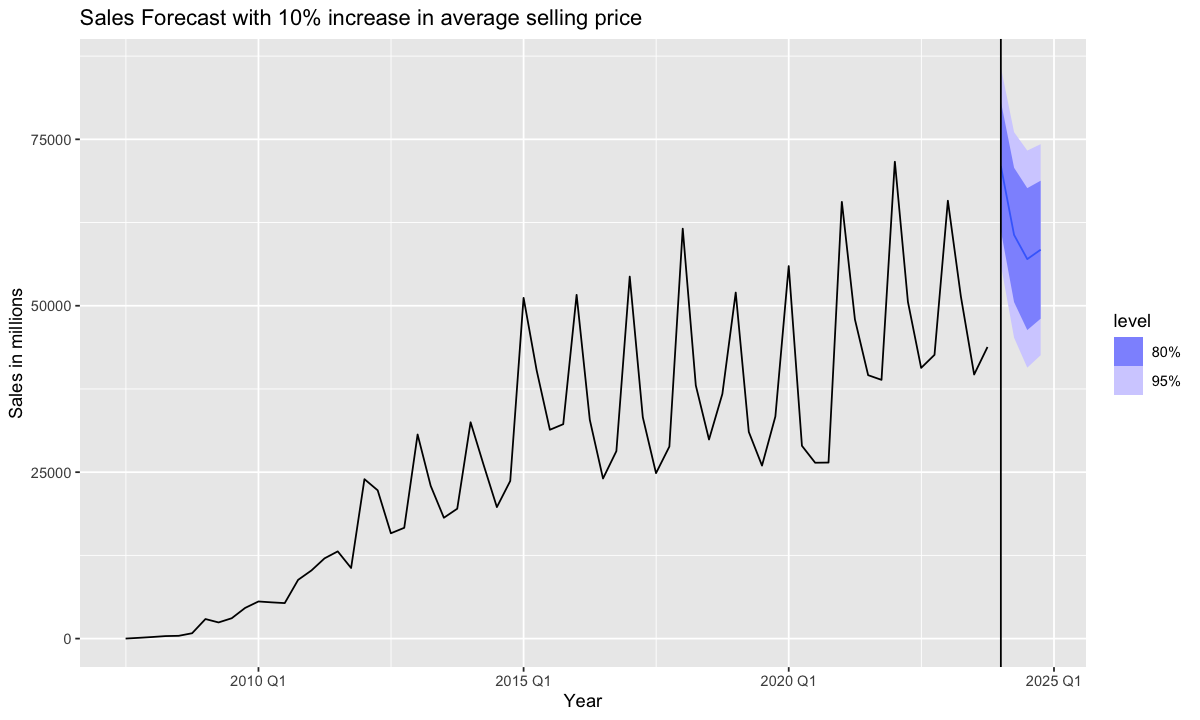

In [64]:
fit_sales_mdl <- ts_apple_data_new|>
  model(TSLM(Sales_in_millions ~ trend() + season() + Avg_Selling_Price))

new_price <- scenarios(
  "10% increase in Average Selling Price" = new_data(ts_apple_data_new, 4) |>
    mutate(Avg_Selling_Price = (mean(ts_apple_data_new$Avg_Selling_Price, na.rm = TRUE) * 1.1)),
  names_to = "Scenario"
)

fcast <- forecast(fit_sales_mdl, new_price)

ts_apple_data_new |>
  autoplot(Sales_in_millions) +
  autolayer(fcast) +
  geom_vline(xintercept = as.Date('2024-01-01')) +
  labs(title = "Sales Forecast with 10% increase in average selling price", y = "Sales in millions", x = "Year")

### Scenario with 10% decrease in Average Selling Price

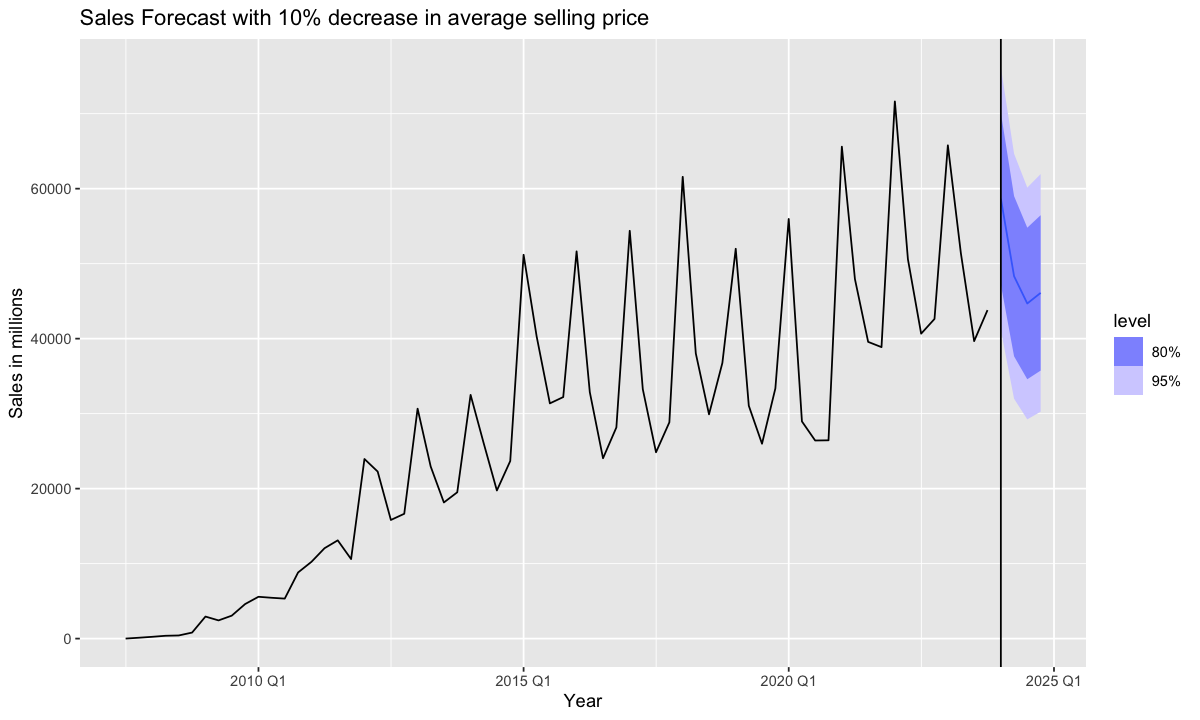

In [65]:
fit_sales_mdl <- ts_apple_data_new|>
  model(TSLM(Sales_in_millions ~ trend() + season() + Avg_Selling_Price))

new_price <- scenarios(
  "10% decrease in Average Selling Price" = new_data(ts_apple_data_new, 4) |>
    mutate(Avg_Selling_Price = (mean(ts_apple_data_new$Avg_Selling_Price, na.rm = TRUE) * 0.9)),
  names_to = "Scenario"
)

fcast <- forecast(fit_sales_mdl, new_price)

ts_apple_data_new |>
  autoplot(Sales_in_millions) +
  autolayer(fcast) +
  geom_vline(xintercept = as.Date('2024-01-01')) +
  labs(title = "Sales Forecast with 10% decrease in average selling price", y = "Sales in millions", x = "Year")

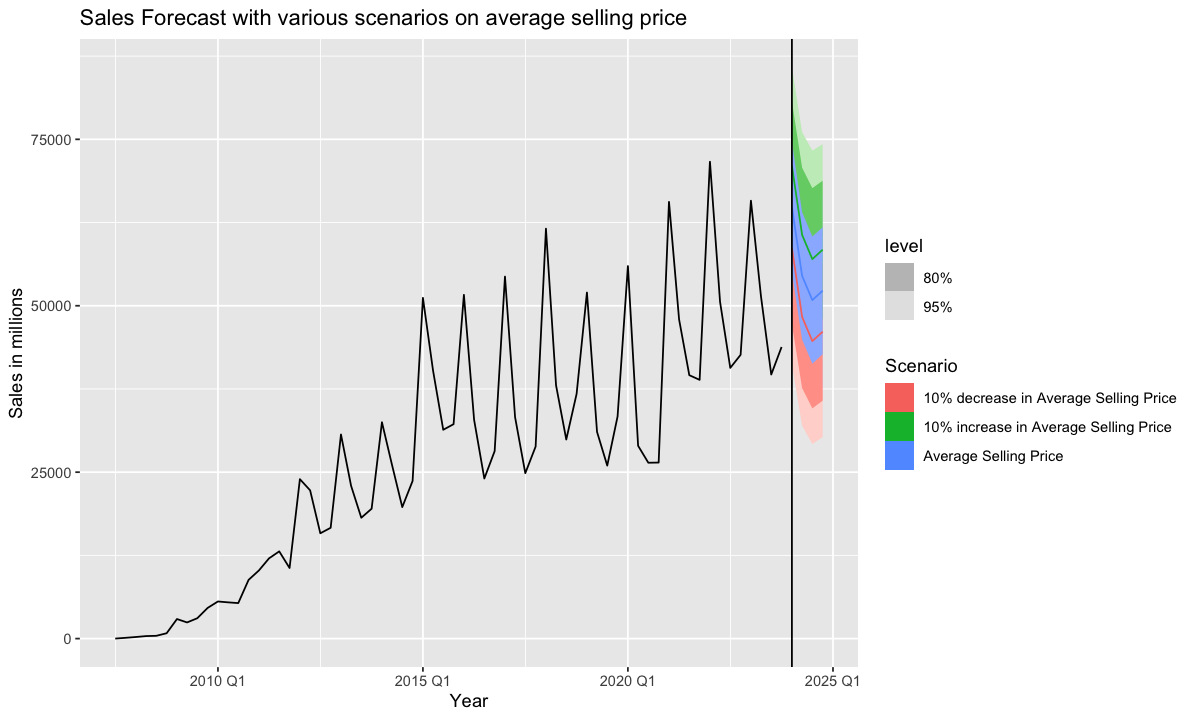

In [66]:
fit_sales_mdl <- ts_apple_data_new|>
  model(TSLM(Sales_in_millions ~ trend() + season() + Avg_Selling_Price))

new_price <- scenarios(
  "Average Selling Price" = new_data(ts_apple_data_new, 4) |>
    mutate(Avg_Selling_Price = (mean(ts_apple_data_new$Avg_Selling_Price, na.rm = TRUE) * 1)),
  "10% increase in Average Selling Price" = new_data(ts_apple_data_new, 4) |>
    mutate(Avg_Selling_Price = (mean(ts_apple_data_new$Avg_Selling_Price, na.rm = TRUE) * 1.1)),
  "10% decrease in Average Selling Price" = new_data(ts_apple_data_new, 4) |>
    mutate(Avg_Selling_Price = (mean(ts_apple_data_new$Avg_Selling_Price, na.rm = TRUE) * 0.9)),
  names_to = "Scenario"
)

fcast <- forecast(fit_sales_mdl, new_price)

ts_apple_data_new |>
  autoplot(Sales_in_millions) +
  autolayer(fcast) +
  geom_vline(xintercept = as.Date('2024-01-01')) +
  labs(title = "Sales Forecast with various scenarios on average selling price", y = "Sales in millions", x = "Year")

Finally we can conclude that Revenue (Sales_in_millions) increases when the average selling price is increased, similarly when the average selling price is decreased and the Revenue (Sales_in_millions) also decreases.